<a href="https://colab.research.google.com/github/shwe-hg/capstone-project-on-ML-Regression-/blob/main/Project_on_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bike Sharing Demand Prediction**

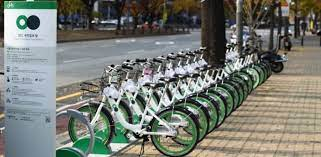

##Project Type : Regression 
##Contribution : Individual 

##Project summary :

###Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

##GitHub Link :                                       
###GitHub Link -

##About the dataset :

###We have the data which contains data like hour , temperature, humidity etc .

###**Dataset info** :

Number of columns - 14

Number of rows - 8760

The dataset contains 14 columns and 8760 rows .

##Dataset Description :

###1.**Date** : year-month-day
###2.**Rented Bike count** - Count of bikes rented at each hour
###3.**Hour** - Hour of he day
###4.**Temperature**-Temperature in Celsius
###5.**Humidity** - %
###6.**Windspeed** - m/s
###7.**Visibility** - 10m
###8.**Dew point temperature** - Celsius
###9.**Solar radiation** - MJ/m2
###10.**Rainfall** - mm
###11.**Snowfall** - cm
###12.**Seasons** - Winter, Spring, Summer, Autumn
###13.**Holiday** - Holiday/No holiday
###14.**Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)

##Importing all libraries :

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')



import datetime as dt

In [184]:
# mounting the google drive to access the files 
from google.colab import drive 
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
# loading dataset 
df=pd.read_csv("/content/SeoulBikeData.csv" ,encoding='unicode_escape')

In [186]:
# first 5 rows
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

head() will give first 5 rows of dataset .

In [187]:
#last 5 rows
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

tail() will give last 5 rows of dataset .

In [188]:
# shape of dataset
df.shape

(8760, 14)

In [189]:
#info about columns 
df.columns 

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

Getting the info of columns present inside the dataset .

In [190]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

info() will give the information of dataset like column and data type .

In [191]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

nunique() will give the unique values present in dataset .

In [192]:
# making a copy of dataset so that original dataset remain unchanged.
df1=df.copy()

In [193]:
# statistical info
df1.describe(include='all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

In [194]:
df1.describe().transpose()

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

describe() will give the statistical information of dataset .

##**Preprocessing the dataset**

###**Duplicate Values**

In [195]:
d_value=df1[df1.duplicated()].shape
print("the no of duplicate values is",d_value)

the no of duplicate values is (0, 14)


We found that there is no duplicate values in the above dataset .

###**Missing values / Null values**

In [196]:
df1.isnull()

Date  Rented Bike Count   Hour  Temperature(°C)  Humidity(%)  \
0     False              False  False            False        False   
1     False              False  False            False        False   
2     False              False  False            False        False   
3     False              False  False            False        False   
4     False              False  False            False        False   
...     ...                ...    ...              ...          ...   
8755  False              False  False            False        False   
8756  False              False  False            False        False   
8757  False              False  False            False        False   
8758  False              False  False            False        False   
8759  False              False  False            False        False   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                False             False                      False   
1                False             False                      False   
2                False             False                      False   
3                False             False                      False   
4                False             False                      False   
...                ...               ...                        ...   
8755             False             False                      False   
8756             False             False                      False   
8757             False             False                      False   
8758             False             False                      False   
8759             False             False                      False   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  \
0                       False         False          False    False    False   
1                       False         False          False    False    False   
2                       False         False          False    False    False   
3                       False         False          False    False    False   
4                       False         False          False    False    False   
...                       ...           ...            ...      ...      ...   
8755                    False         False          False    False    False   
8756                    False         False          False    False    False   
8757                    False         False          False    False    False   
8758                    False         False          False    False    False   
8759                    False         False          False    False    False   

      Functioning Day  
0               False  
1               False  
2               False  
3               False  
4               False  
...               ...  
8755            False  
8756            False  
8757            False  
8758            False  
8759            False  

[8760 rows x 14 columns]

In [197]:
df1.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There is no null or missing values present in dataset .

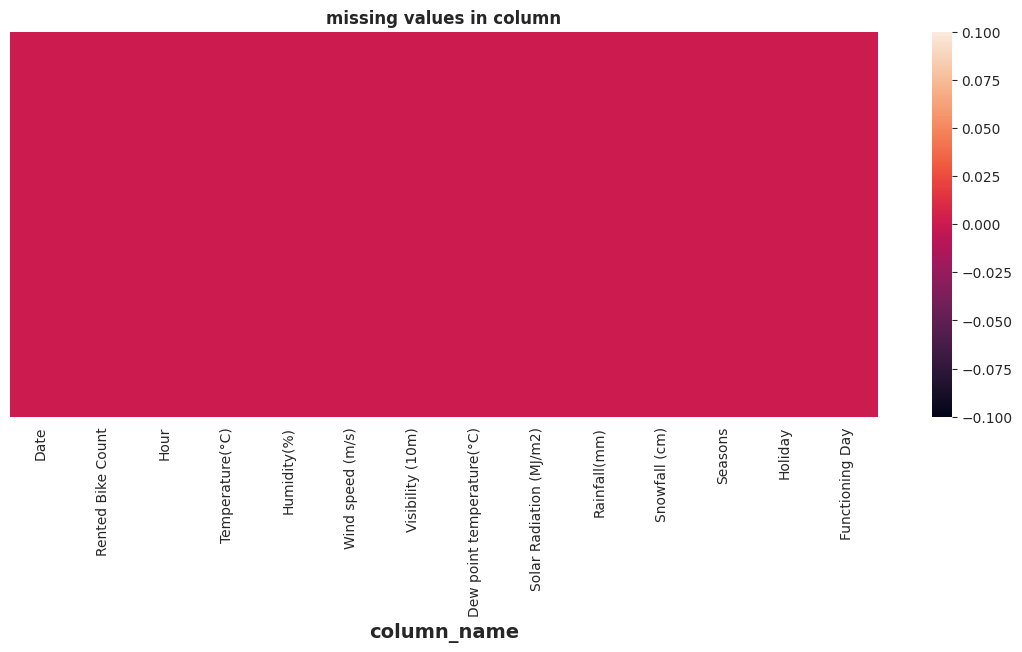

In [198]:
# heatmap for missing values .
plt.figure(figsize=(14, 5))
sns.heatmap(df1.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=12)
plt.show()


The above heatmap is for missing values present in dataset .

###**Getting the data type of dataset** .



In [199]:
df1.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [200]:
df1['Date'].value_counts()

01/12/2017    24
09/08/2018    24
07/08/2018    24
06/08/2018    24
05/08/2018    24
              ..
31/03/2018    24
30/03/2018    24
29/03/2018    24
28/03/2018    24
30/11/2018    24
Name: Date, Length: 365, dtype: int64

**converting date column dtype object to date.**

In [201]:
df1['Date']= pd.to_datetime(df1['Date'])

In [202]:
df1['Date']=pd.to_datetime(df1['Date'])
df1['month'] = df1['Date'].apply(lambda x : x.month)
df1['day_of_week'] = df1['Date'].dt.day_name()
df1['weekdays_weekend']=df1['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df1=df1.drop(columns=['Date','day_of_week'],axis=1)

**we converted the date column into 3 different column  i.e day , month , year**.


**the day column contain info of 365 days , for our relevance we converted day into weekdays and weekend . after that we dropped the column day_of_week** .

In [203]:
df1['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

Text(0.5, 1.0, 'weekdays_and_weekend')

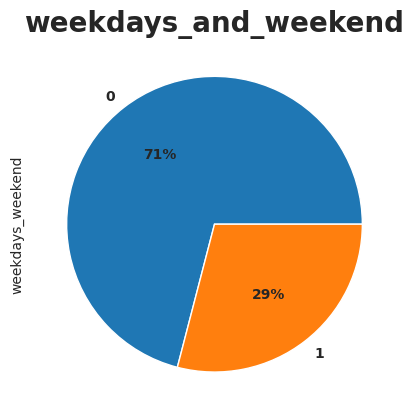

In [204]:
plt.subplot(1,1,1)
weekdays_and_weekend = df1.weekdays_weekend.value_counts()
weekdays_and_weekend.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('weekdays_and_weekend',fontweight="bold", size=20)

**The % of weekends is 29% where as weekdays is 71%.**

<Axes: >

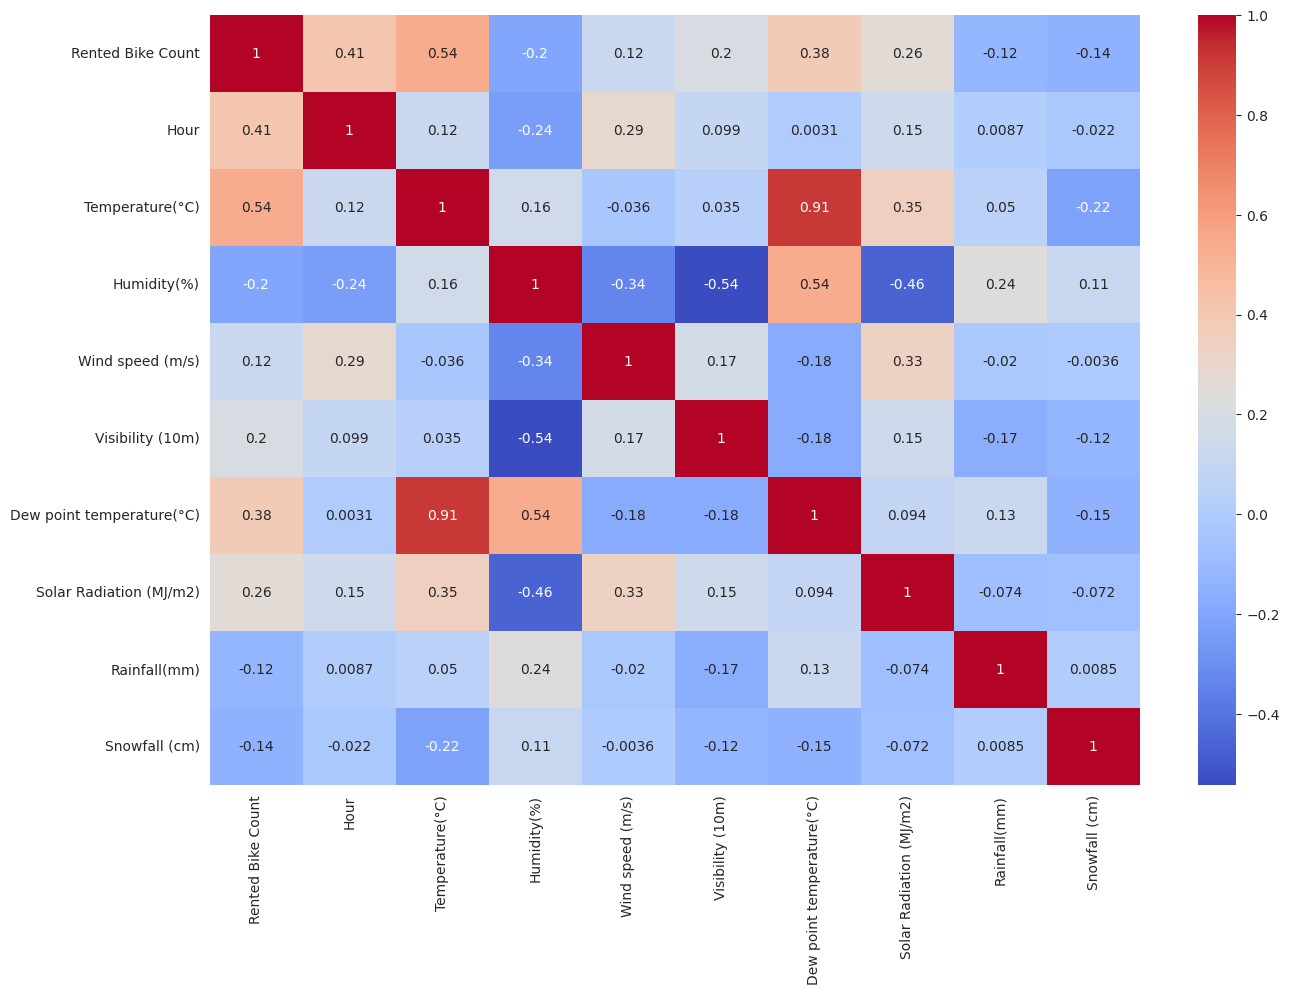

In [205]:
#checking correlation with the help of heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

###**conclusion**

**It shows the relationship between different numerical values of dataset** .


##**Multicollinearity**

In [206]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [207]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])


variables       VIF
0                     Hour  3.961874
1          Temperature(°C)  3.236809
2              Humidity(%)  6.114153
3         Wind speed (m/s)  4.616621
4         Visibility (10m)  5.404128
5  Solar Radiation (MJ/m2)  2.272068
6             Rainfall(mm)  1.081252
7            Snowfall (cm)  1.125304
8                    month  4.580307
9         weekdays_weekend  1.399708

**A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis.**

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

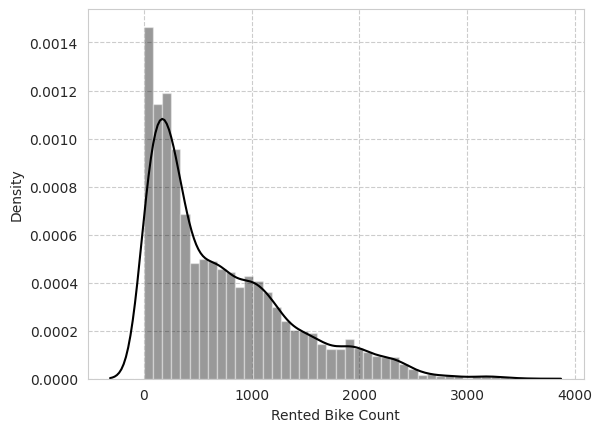

In [208]:
sns.distplot(df1['Rented Bike Count'],color="black")

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

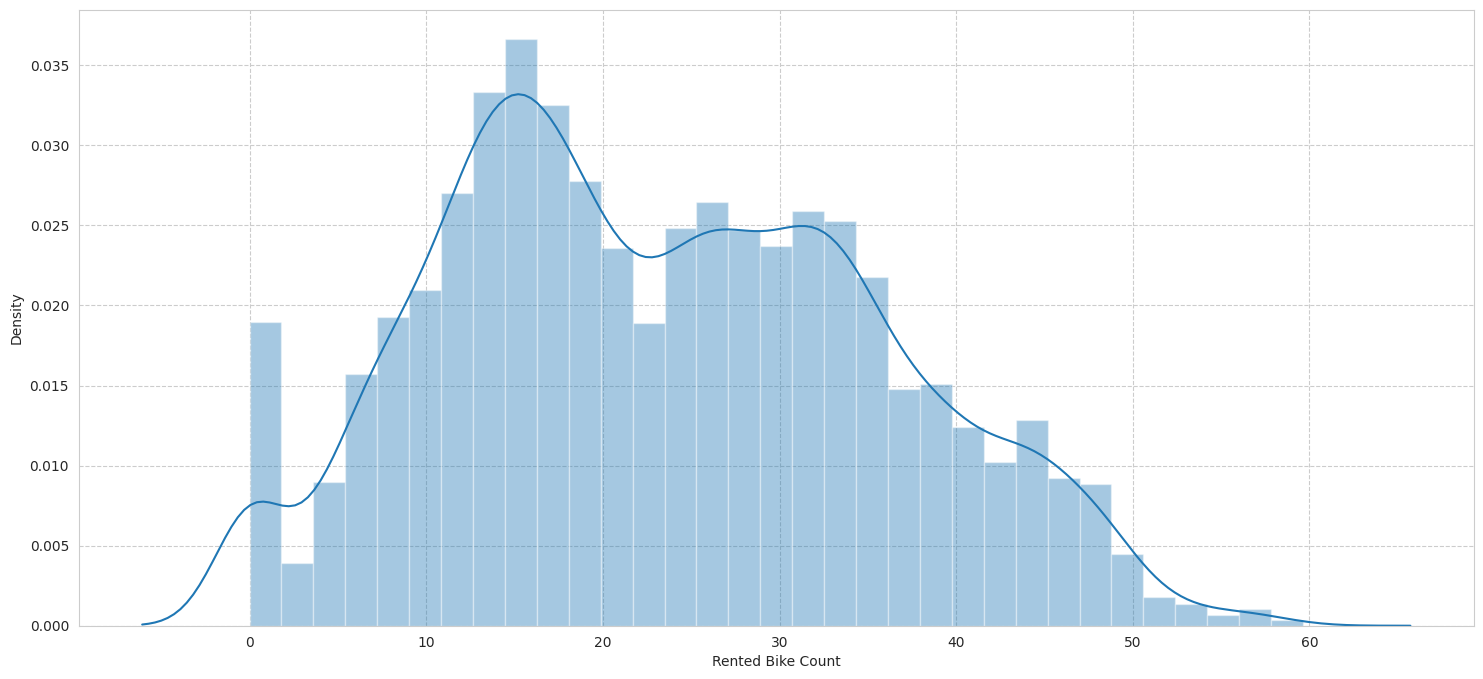

In [209]:
#transforming square_root transformation
plt.figure(figsize=(18,8))
sns.distplot(np.sqrt(df1['Rented Bike Count']))

In [210]:
df1.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
month                          int64
weekdays_weekend               int64
dtype: object

In [211]:
#extracting numeric columns
numeric_columns= df1.select_dtypes(exclude='object')

In [212]:
numeric_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekdays_weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [213]:
numeric_columns.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)        month  \
count              8760.000000   8760.000000    8760.000000  8760.000000   
mean                  0.569111      0.148687       0.075068     6.526027   
std                   0.868746      1.128193       0.436746     3.448048   
min                   0.000000      0.000000       0.000000     1.000000   
25%                   0.000000      0.000000       0.000000     4.000000   
50%                   0.010000      0.000000       0.000000     7.000000   
75%                   0.930000      0.000000       0.000000    10.000000   
max                   3.520000     35.000000       8.800000    12.000000   

       weekdays_weekend  
count       8760.000000  
mean           0.290411  
std            0.453978  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            1.000000

In [214]:
numeric_columns.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   
month                      8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend           8760.0     0.290411    0.453978   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80  
month                         7.00    10.00    12.00  
weekdays_weekend              0.00     1.00     1.00

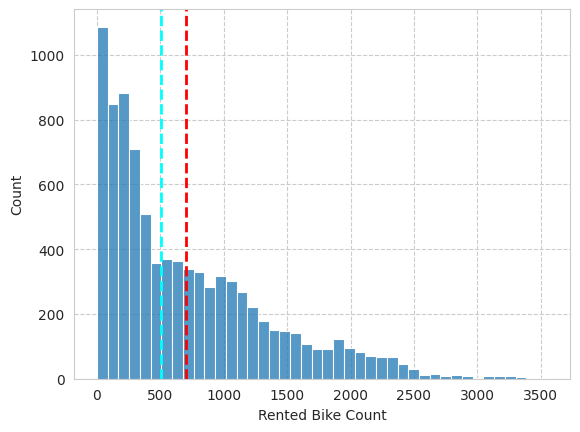

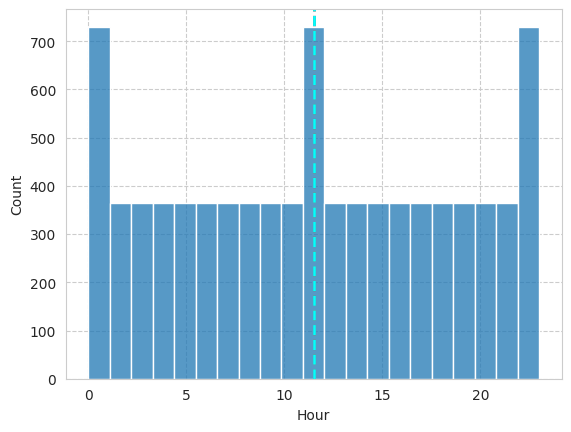

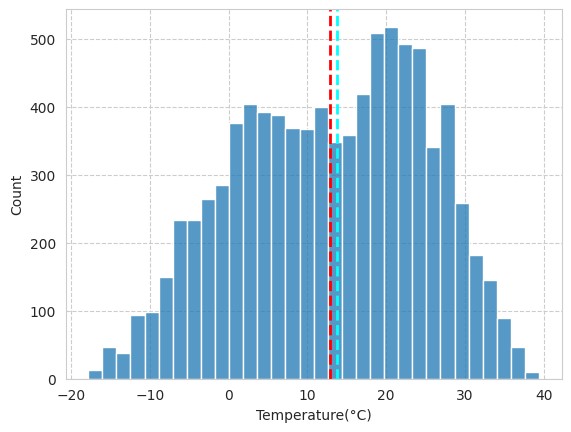

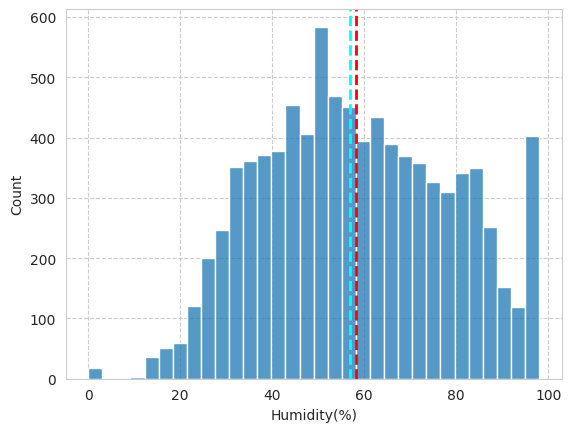

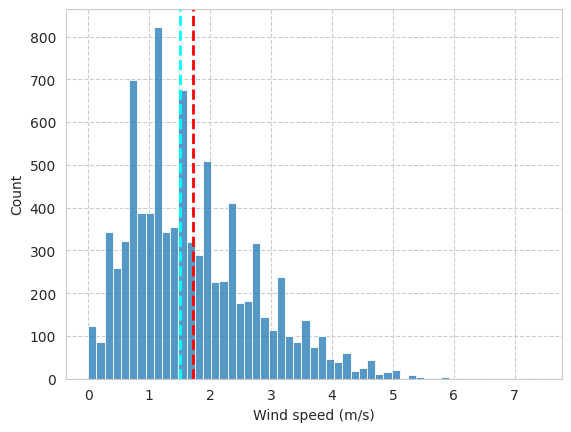

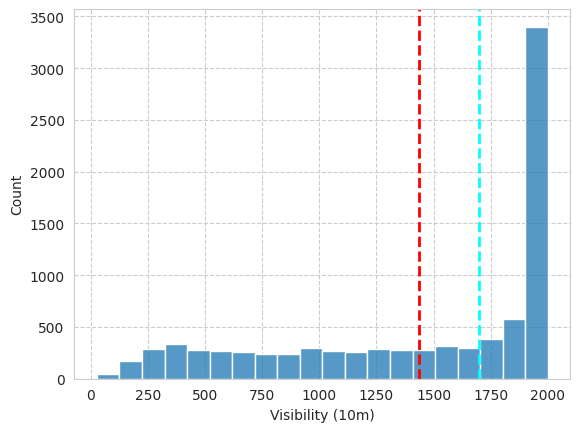

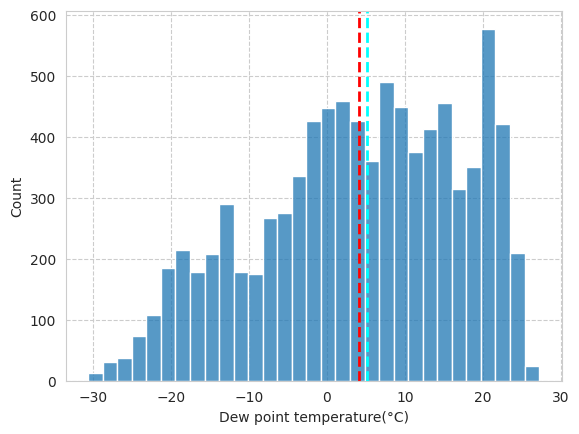

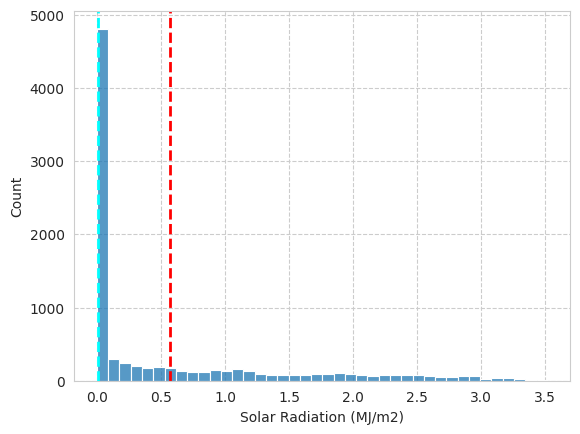

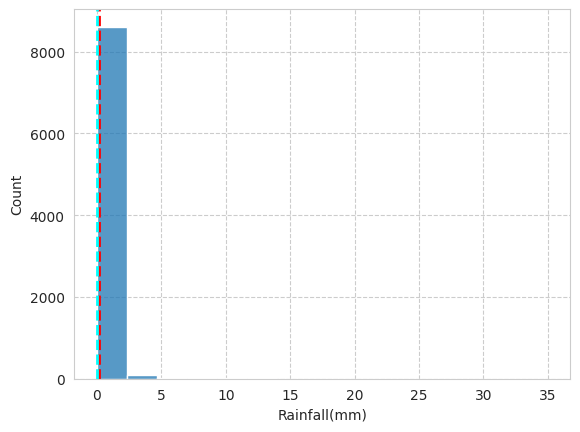

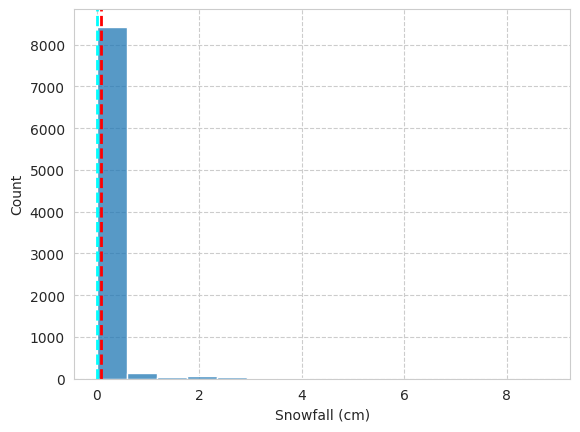

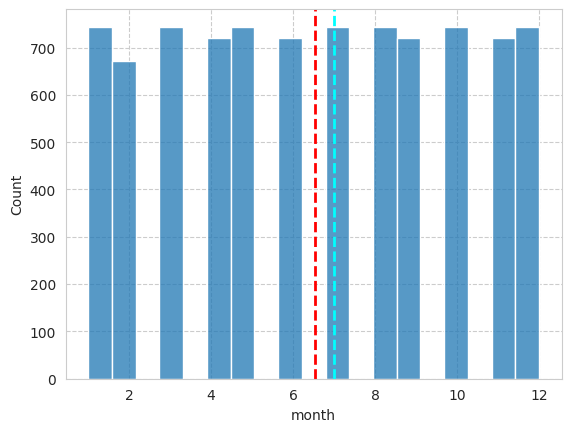

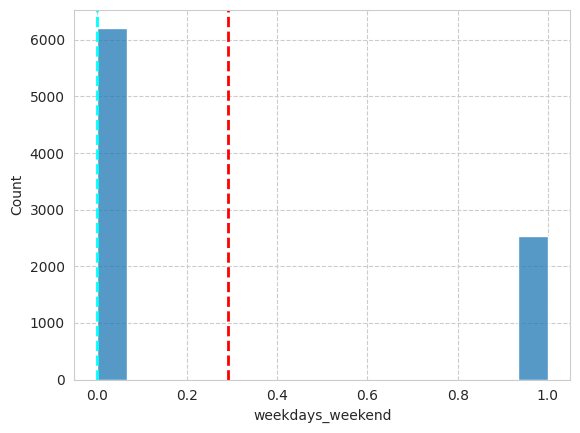

In [215]:
for col in numeric_columns[:]:
  sns.histplot(df1[col])
  plt.axvline(df1[col].mean(), color='red', linestyle='dashed', linewidth=2)
  plt.axvline(df1[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

##**Let's check distribution of target variable- "Rented Bike Count"**

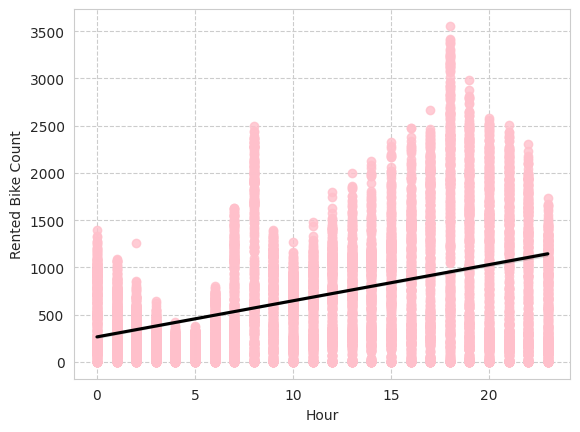

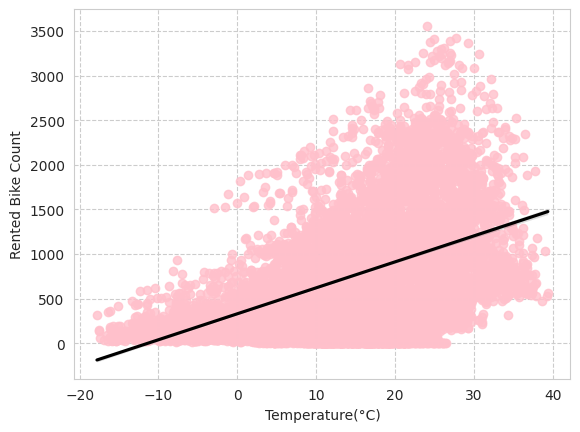

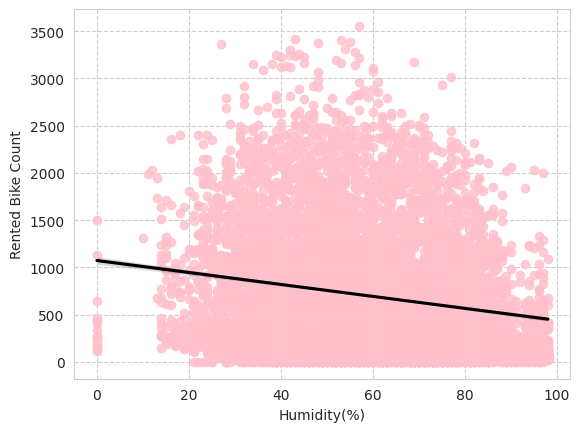

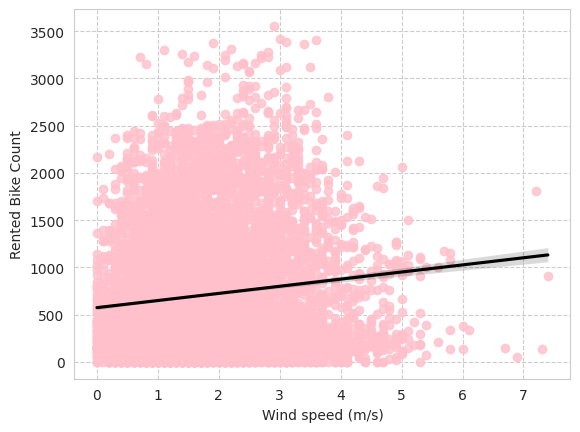

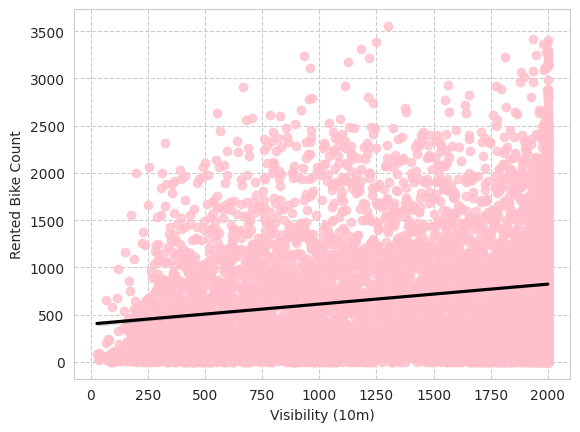

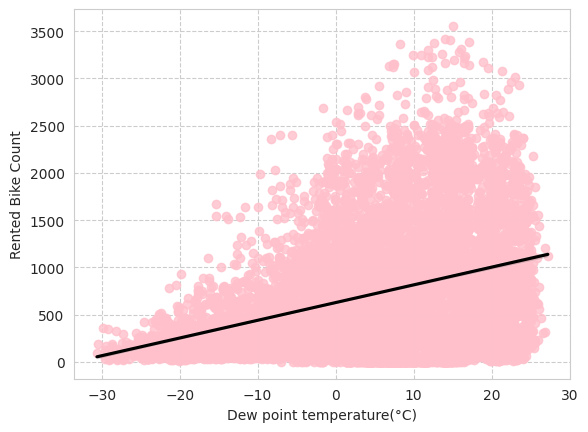

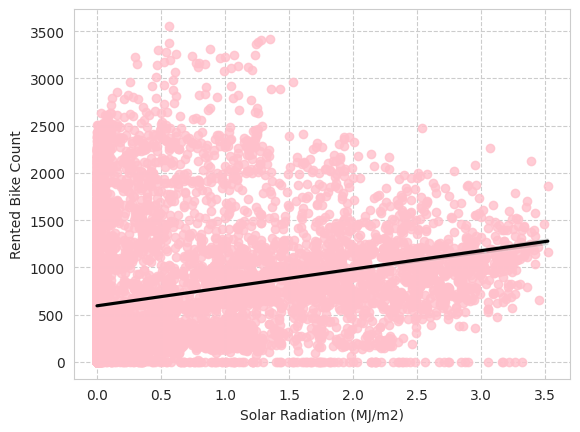

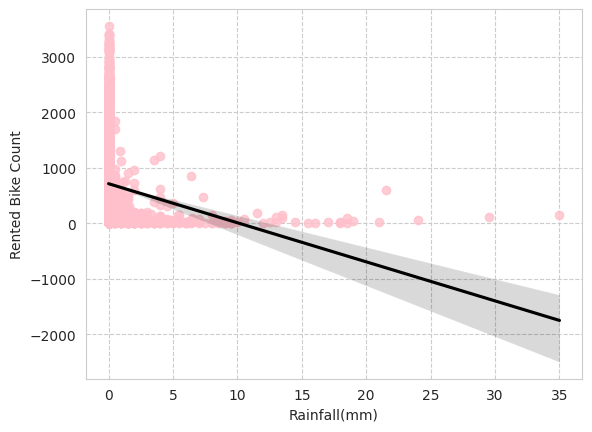

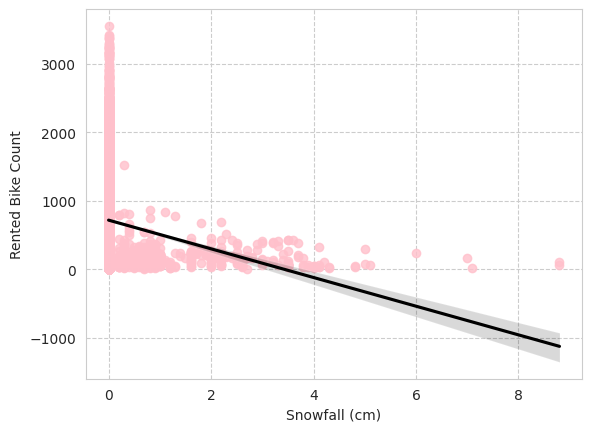

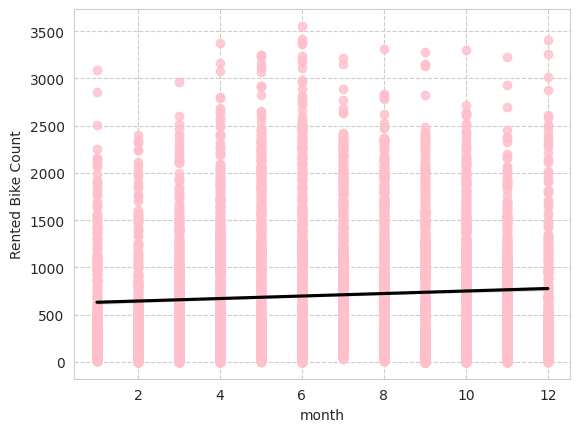

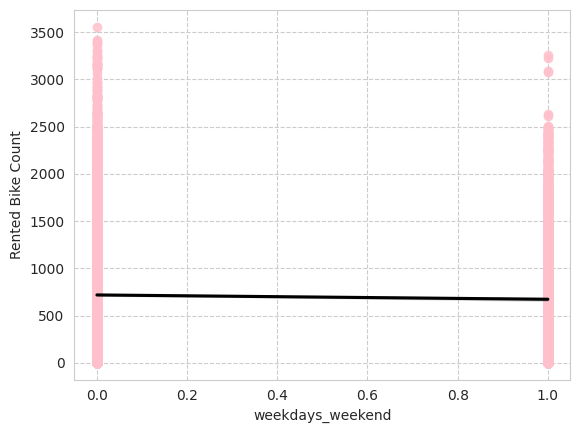

In [216]:
for col in  numeric_columns [:9]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df1[col],scatter_kws={'color':'pink'},y=df1["Rented Bike Count"],line_kws={"color": "black"})
  
  plt.show()

In [217]:
df1.dtypes


Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
month                          int64
weekdays_weekend               int64
dtype: object

**Doing EDA on Categorcal data**.

In [218]:
#Extracting categorical columns
categorical_columns= df1.select_dtypes(include='object')

In [219]:
categorical_columns

Seasons     Holiday Functioning Day
0     Winter  No Holiday             Yes
1     Winter  No Holiday             Yes
2     Winter  No Holiday             Yes
3     Winter  No Holiday             Yes
4     Winter  No Holiday             Yes
...      ...         ...             ...
8755  Autumn  No Holiday             Yes
8756  Autumn  No Holiday             Yes
8757  Autumn  No Holiday             Yes
8758  Autumn  No Holiday             Yes
8759  Autumn  No Holiday             Yes

[8760 rows x 3 columns]

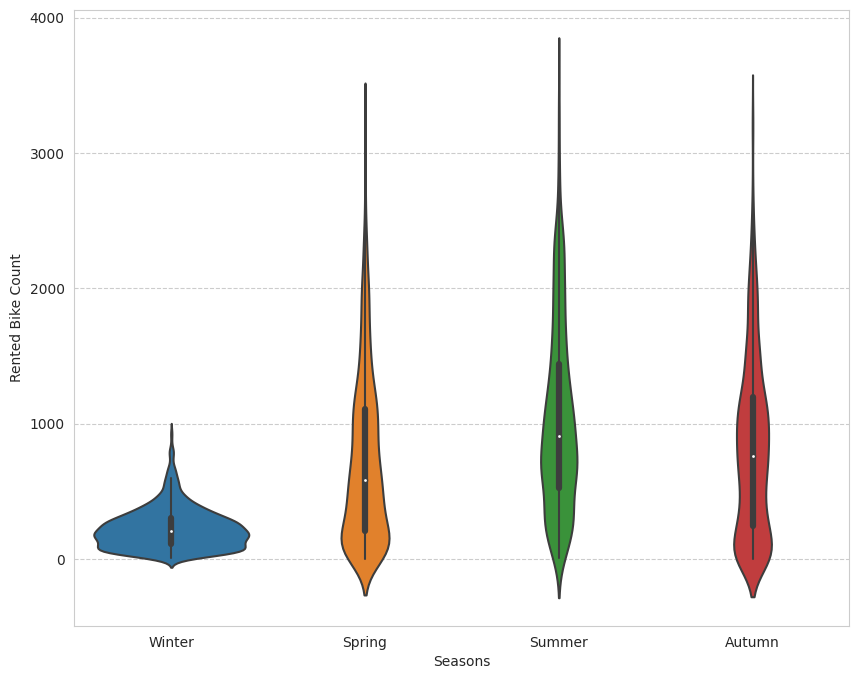

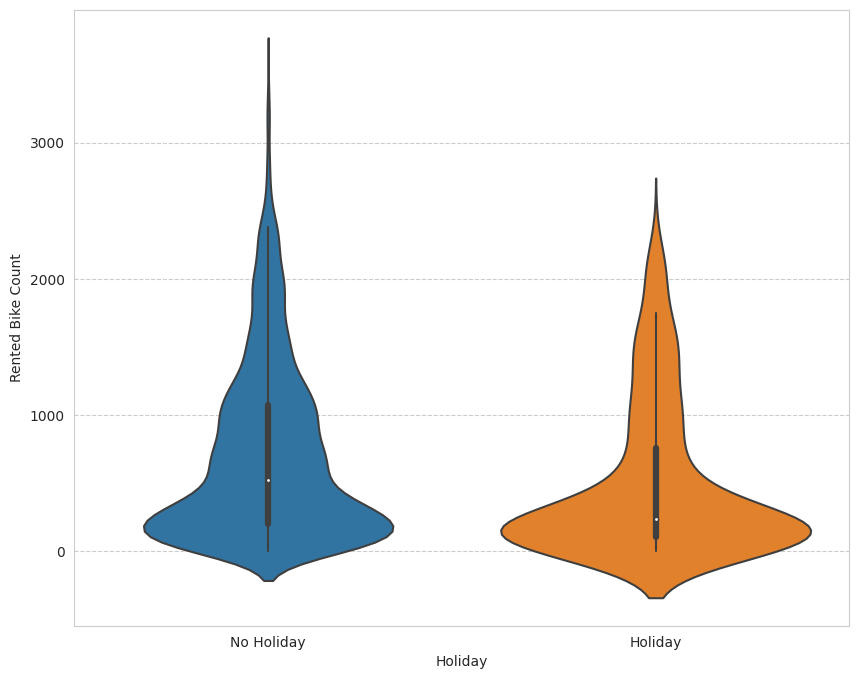

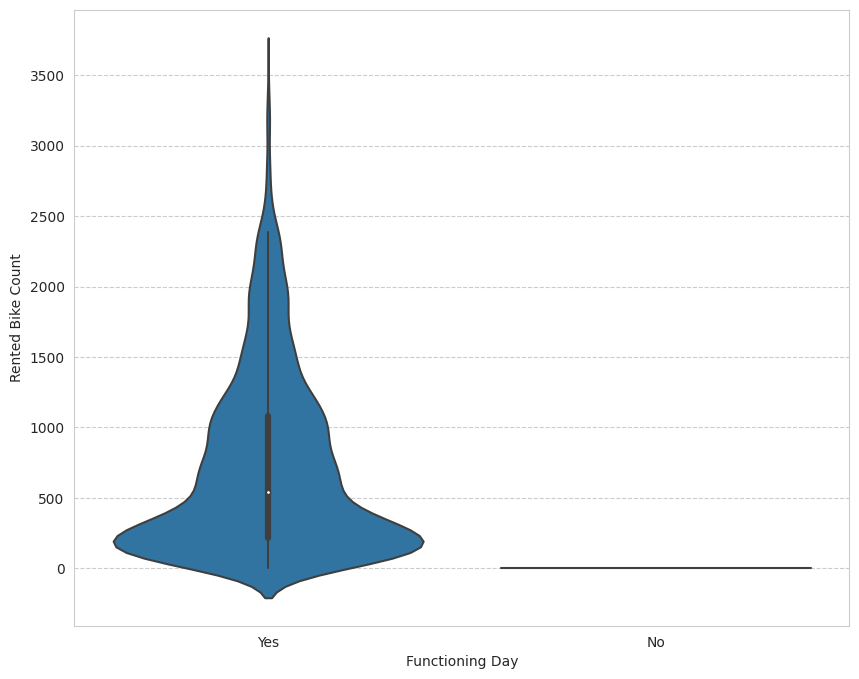

In [220]:
for col in categorical_columns:
    plt.figure(figsize=(10,8))
    sns.violinplot(x=df1[col], y=df1["Rented Bike Count"])
    plt.show()


In [221]:

df1['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

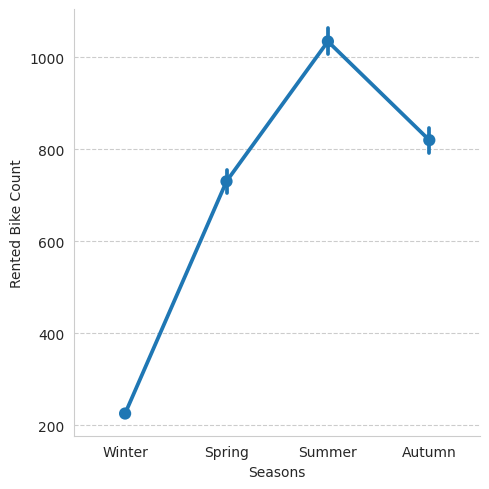

In [222]:
sns.catplot(x='Seasons', y='Rented Bike Count', kind='point', data=df1)


[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

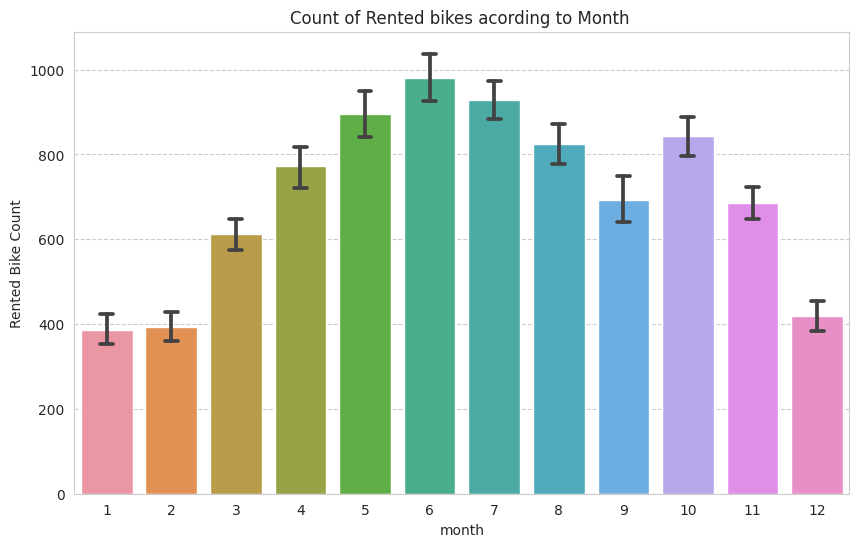

In [223]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df1,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

###**conclusion**



**The above graph give the count of rented bike through out the year**.






**As we can see starting months having less rent ratio but as we go further the rented bike ratio is increasing and at the end of year again decreasing** .

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

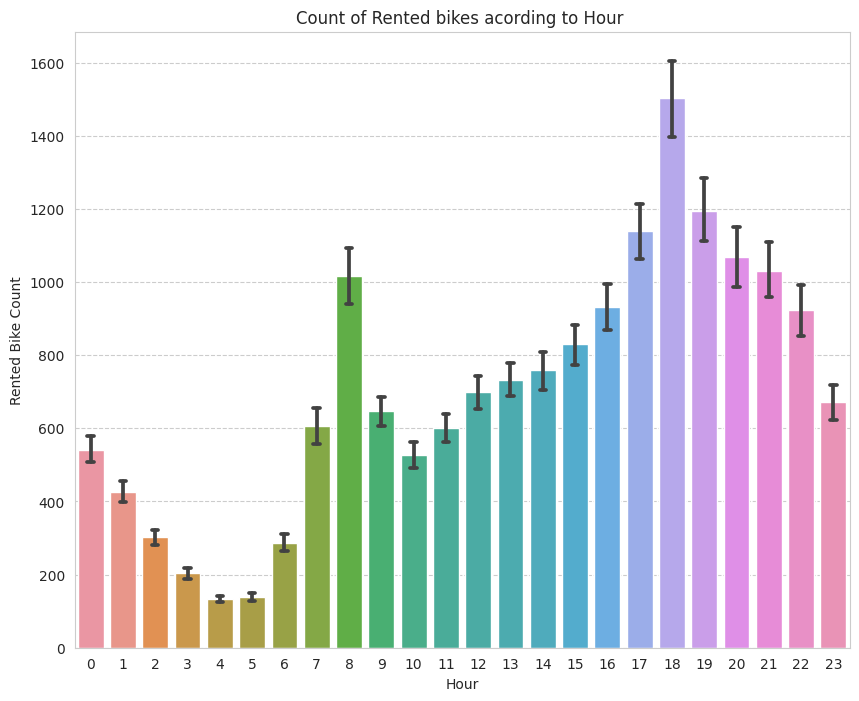

In [224]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df1,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

###**conclusion**

**From graph we can clearly say that at evening the bike rent count is high** .

<Axes: xlabel='weekdays_weekend', ylabel='Rented Bike Count'>

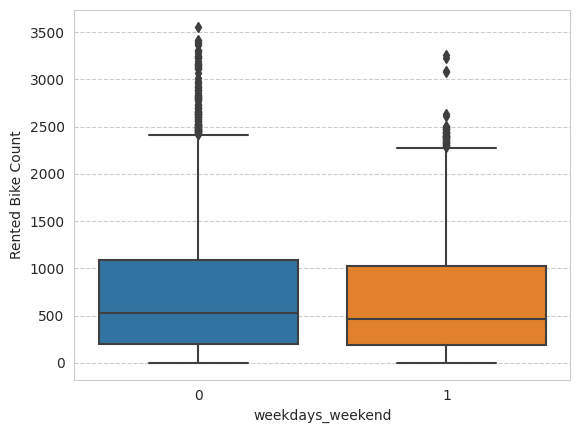

In [225]:
sns.boxplot(data=df1, x='weekdays_weekend', y='Rented Bike Count')


###**conclusion**

**Ploting the graph which shows the renting of bike according to weekdays and weekends** .


**As we can see weekdays is having a little more count then weekends** .

[Text(0.5, 1.0, 'The Count of Rented bikes acording to weekdays_weekend ')]

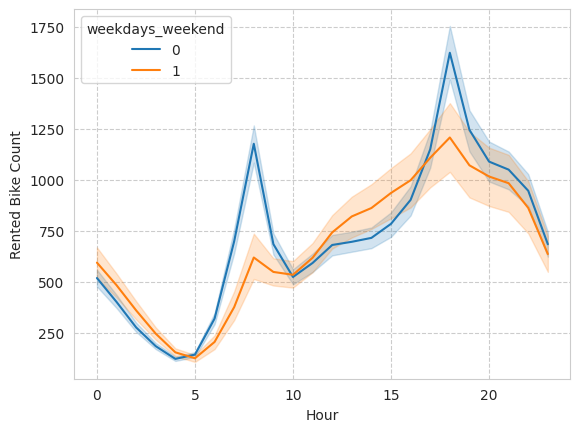

In [226]:
sns.lineplot(data=df1, x='Hour', y='Rented Bike Count', hue='weekdays_weekend')
ax.set(title='The Count of Rented bikes acording to weekdays_weekend ')


###**conclusion**

**The above graph shows the count of rented bike according to every hour of the day according to weekdays and weekends** .


**As we can see weekdays are having more bike rents then weekends and at evening time the bike count is increasing drastically as compared to other time of the day** .



[Text(0.5, 1.0, 'The Count of Rented bikes acording to Functioning Day ')]

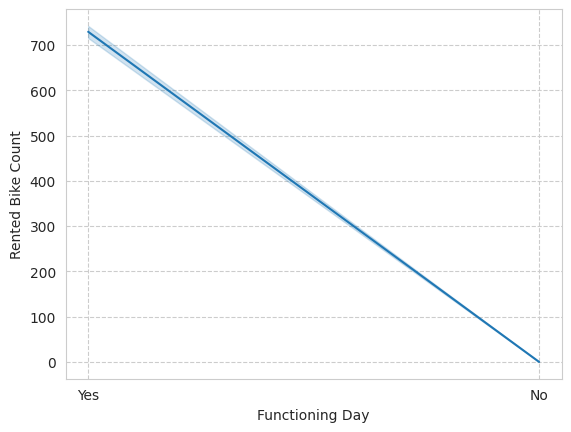

In [227]:
sns.lineplot(data=df1, x='Functioning Day', y='Rented Bike Count')
ax.set(title='The Count of Rented bikes acording to Functioning Day ')

###**conclusion**

**The renting of bike is happening on functioning day only** .

[Text(0.5, 1.0, 'The Count of Rented bikes acording to hour from Functioning Day ')]

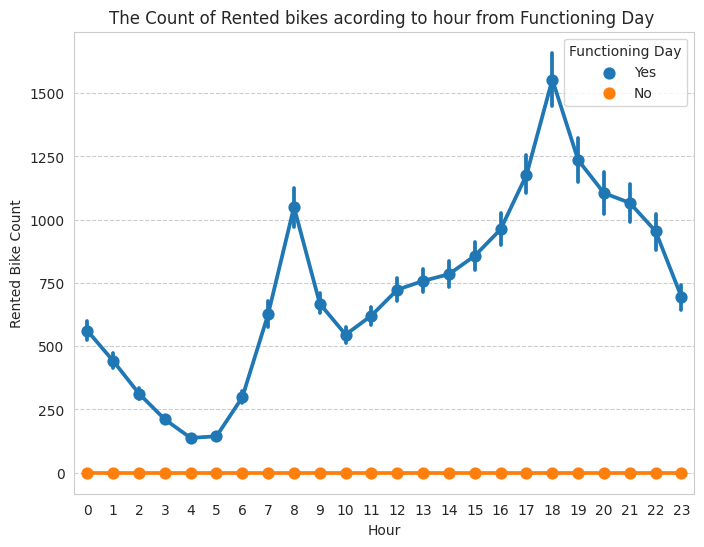

In [228]:
fig,ax=plt.subplots(figsize=(8,6))
sns.pointplot(data=df1,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='The Count of Rented bikes acording to hour from Functioning Day ')

###**conclusion**

**The renting of bike according to to hour is also on functioning day , and is reaching its top at evening** .

[Text(0.5, 1.0, 'The Count of Rented bikes acording to Holiday')]

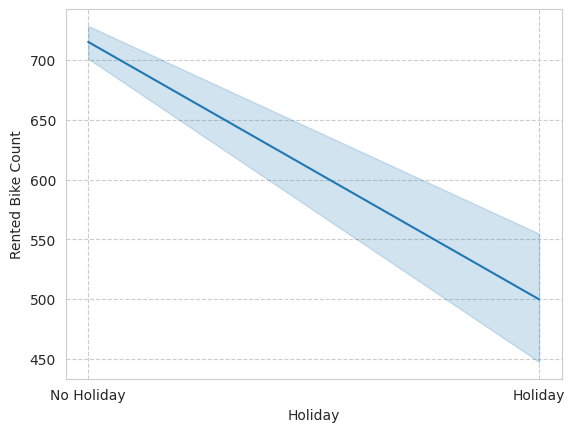

In [229]:
sns.lineplot(data=df1, x='Holiday', y='Rented Bike Count')
ax.set(title='The Count of Rented bikes acording to Holiday')

###**conclusion**

**The renting of bike is happening on both working day and on hoilday , but on working day it is having more count then holiday** .

[Text(0.5, 1.0, 'The Count of Rented bikes acording to hour from Holiday ')]

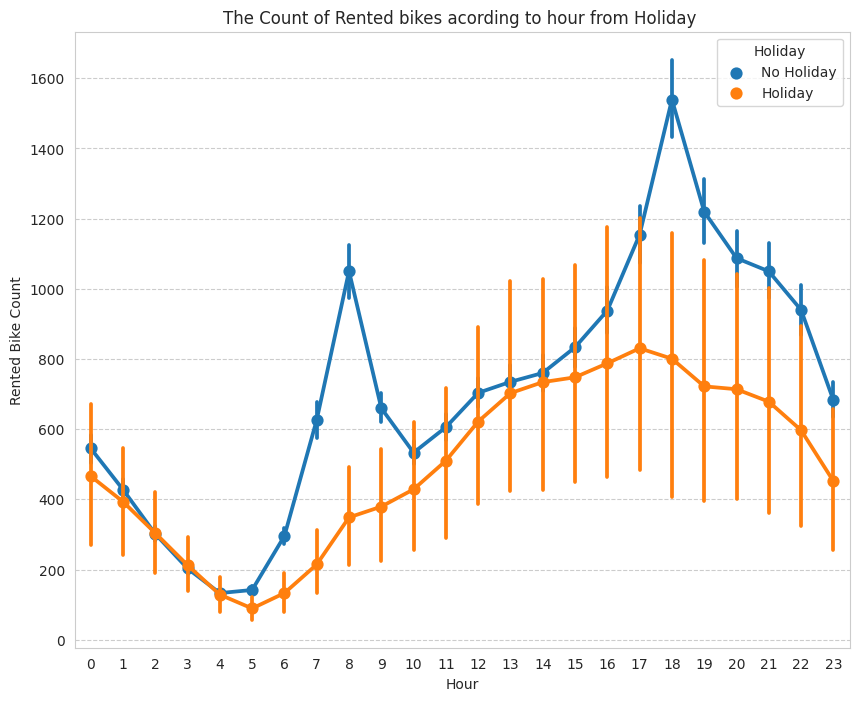

In [230]:
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=df1,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='The Count of Rented bikes acording to hour from Holiday ')

###**conclusion**

**The above graph shows the renting of bike throughout the day according to hour depending upon holiday or no holiday** .


**There is sudden peak between 6/7AM to 10 Am becoz of office & collage going time and  Again there is peak at 7 PM. may be its office leaving time so**.

Text(0.5, 1.0, 'holiday and non holiday are')

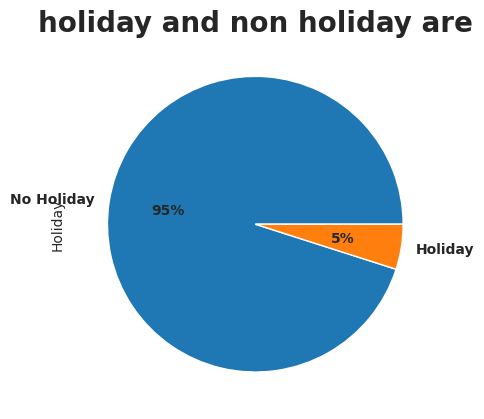

In [231]:
plt.subplot(1,1,1)
holiday = df1.Holiday.value_counts()
holiday.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('holiday and non holiday are',fontweight="bold", size=20)

###**conclusion**

**The graph shows the precentage of holiday i.e 5% and precentage of no hoilday 95%** .

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

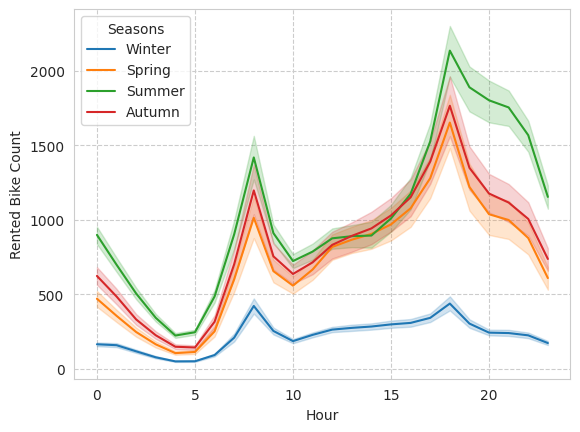

In [232]:
#ploting cat plot for more info
sns.lineplot(x='Hour',y='Rented Bike Count',data=df1 , hue='Seasons')

###**conclusion**


**Out of all seasons Summer is having maximum renting followed by Autumn , Spring and least renting reason is Winter and at the time of evening the renting is high**.

##**Let's check distribution of target variable- "Density"**.

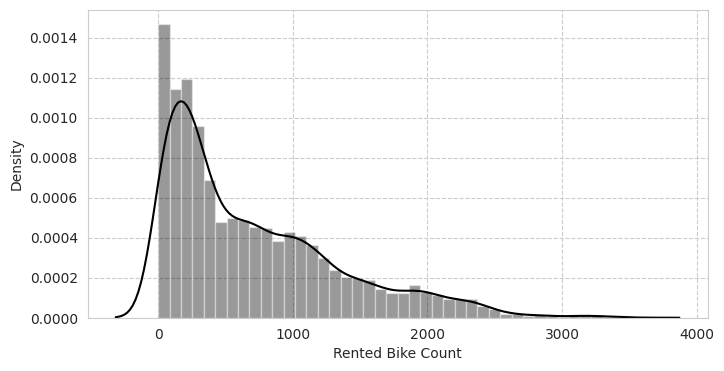

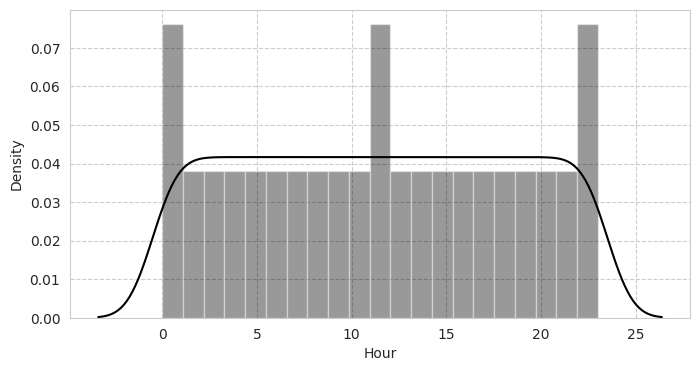

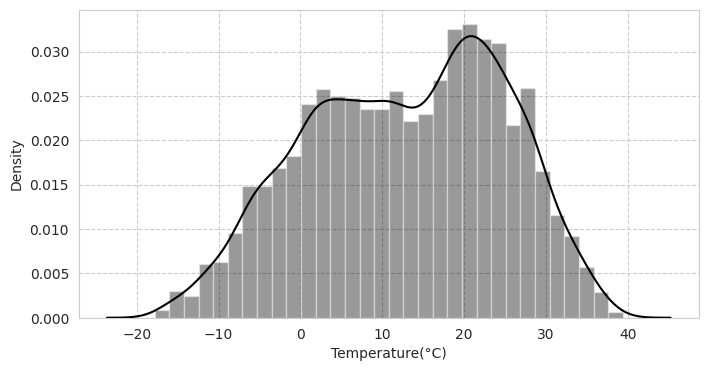

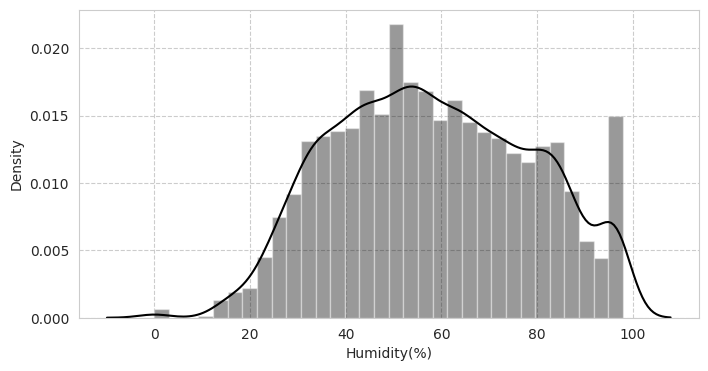

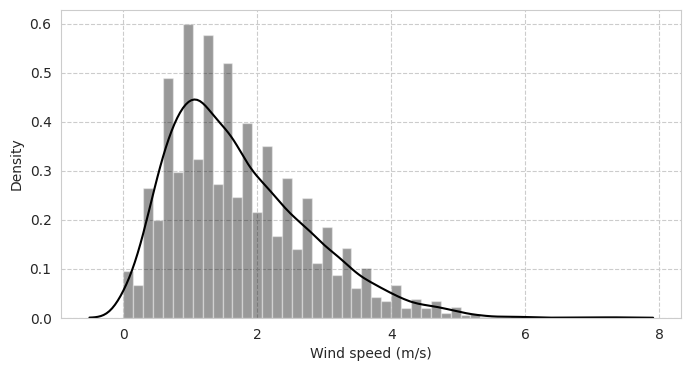

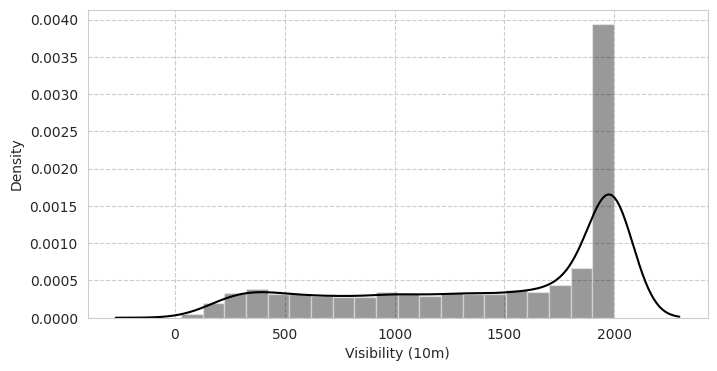

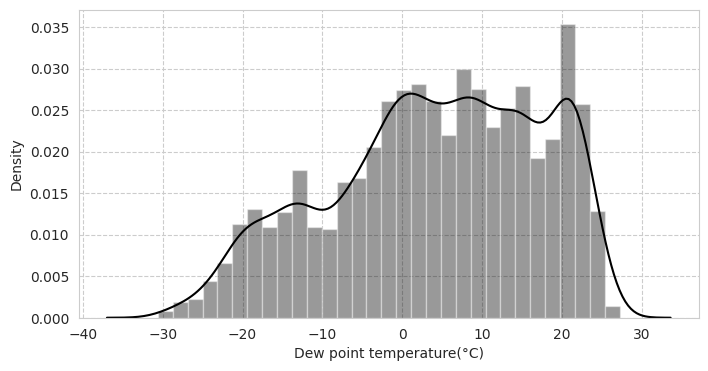

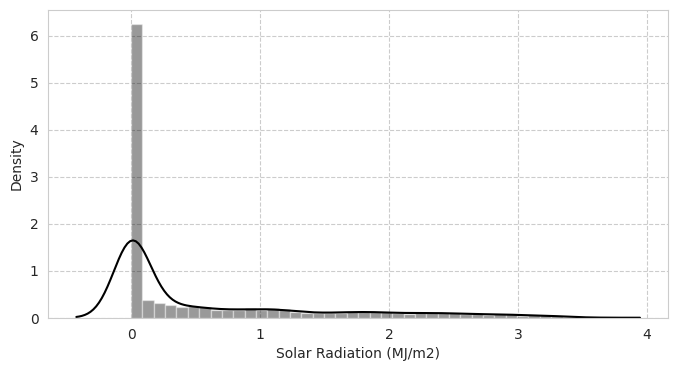

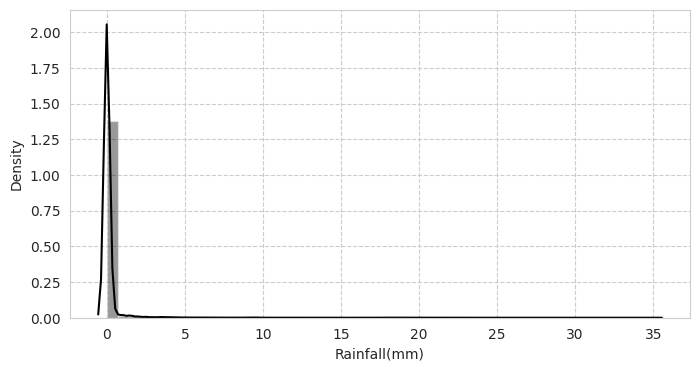

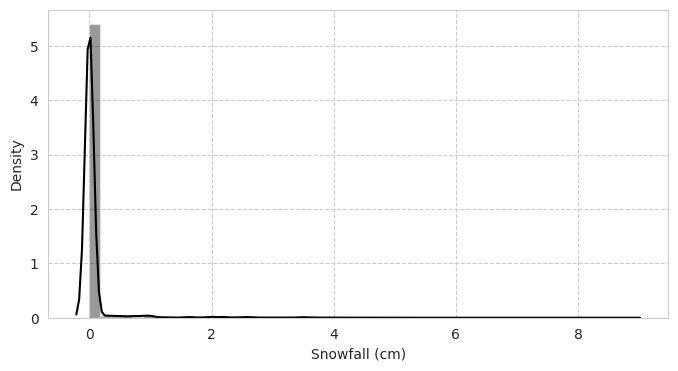

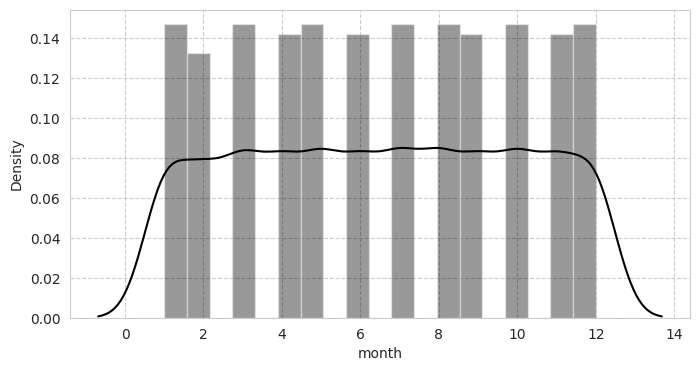

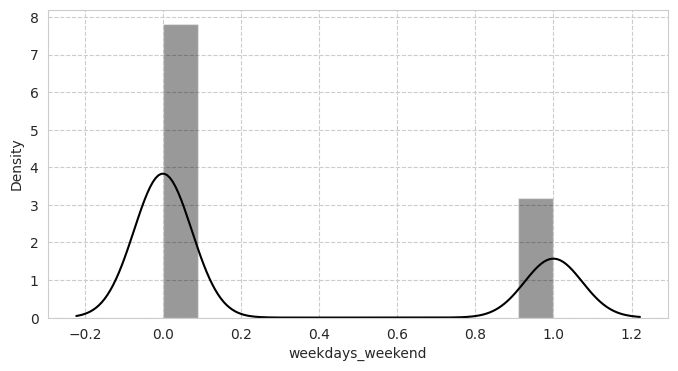

In [233]:
for col in numeric_columns:
  plt.figure(figsize=(8,4))
  sns.distplot(x=df1[col],color="black")
  plt.xlabel(col)
plt.show()


###**Temperature**:
**1)For the temperature below 0 deg celicus the bike rent count is significantly decreased because may be people don't want to ride bike in such cold temperature**.


**2)But for normal temperature the Bike rent count is very high**.



###**humidity**

**1) From the graph we can see humidty is inversely proportional to bike rent count. As humdity percentage is increasing there is a decrease in bike rent count.**


###**Wind Speed:**

**1) From 0 to 4m/s wind speed there is a good bike rent count, as it increased from 4 m/s the bike rent count is decreasing** .



###**Visibility**


**1) It's very obivious that as visibilty increases the bike rent count also increases. Nobody would prefere to ride in low visibilty.**

###**Dew Point Temperature**


**1)As dew temperature goes below 0 deg celcius there is less bike rent count.same case as Temperature.**



###**Solar radiation**
**1) The bike rent count is high when solar radiation is low and it is decreasing while increase in Solar radiation .**

###**Rainfall**
**1) Its very obivious that people usually do not like ride bikes in rain so the bike rent count is less while raining**

###**snowfall**

**1) Its very obivious that people usually do not like ride bikes in snow so the bike rent count is less while snowing**


In [234]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_columns,drop_first=True)

In [235]:
dummy_categorical_feature

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8755                    1  
8756                    1  
8757                    1  
8758                    1  
8759                    1  

[8760 rows x 5 columns]

In [236]:
#concating numeric columns and dummy columns and creating final df
final_df= pd.concat([dummy_categorical_feature,numeric_columns],axis=1)

In [237]:
final_df.head()


Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0               0               0               1                   1   
1               0               0               1                   1   
2               0               0               1                   1   
3               0               0               1                   1   
4               0               0               1                   1   

   Functioning Day_Yes  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0                    1                254     0             -5.2           37   
1                    1                204     1             -5.5           38   
2                    1                173     2             -6.0           39   
3                    1                107     3             -6.2           40   
4                    1                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  month  \
0                      0.0           0.0            0.0      1   
1                      0.0           0.0            0.0      1   
2                      0.0           0.0            0.0      1   
3                      0.0           0.0            0.0      1   
4                      0.0           0.0            0.0      1   

   weekdays_weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [238]:
final_df.tail()

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  Rented Bike Count  Hour  Temperature(°C)  \
8755                    1               1003    19              4.2   
8756                    1                764    20              3.4   
8757                    1                694    21              2.6   
8758                    1                712    22              2.1   
8759                    1                584    23              1.9   

      Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
8755           34               2.6              1894   
8756           37               2.3              2000   
8757           39               0.3              1968   
8758           41               1.0              1859   
8759           43               1.3              1909   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
8755                      -10.3                      0.0           0.0   
8756                       -9.9                      0.0           0.0   
8757                       -9.9                      0.0           0.0   
8758                       -9.8                      0.0           0.0   
8759                       -9.3                      0.0           0.0   

      Snowfall (cm)  month  weekdays_weekend  
8755            0.0     11                 0  
8756            0.0     11                 0  
8757            0.0     11                 0  
8758            0.0     11                 0  
8759            0.0     11                 0

In [239]:
final_df.describe().T

count         mean         std   min     25%  \
Seasons_Spring             8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Summer             8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Winter             8760.0     0.246575    0.431042   0.0    0.00   
Holiday_No Holiday         8760.0     0.950685    0.216537   0.0    1.00   
Functioning Day_Yes        8760.0     0.966324    0.180404   0.0    1.00   
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   
month                      8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend           8760.0     0.290411    0.453978   0.0    0.00   

                               50%      75%      max  
Seasons_Spring                0.00     1.00     1.00  
Seasons_Summer                0.00     1.00     1.00  
Seasons_Winter                0.00     0.00     1.00  
Holiday_No Holiday            1.00     1.00     1.00  
Functioning Day_Yes           1.00     1.00     1.00  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80  
month                         7.00    10.00    12.00  
weekdays_weekend              0.00     1.00     1.00

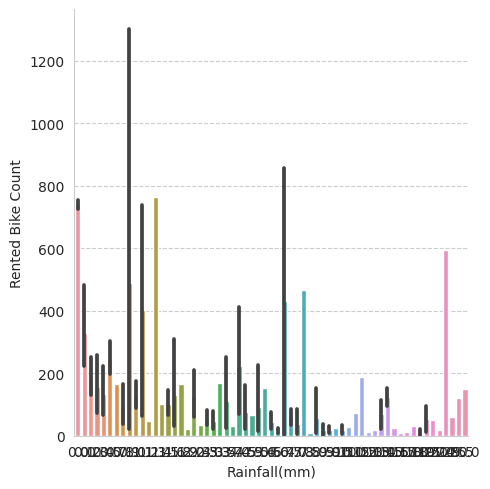

In [240]:
sns.catplot(x='Rainfall(mm)', y='Rented Bike Count', data=df1, kind='bar')


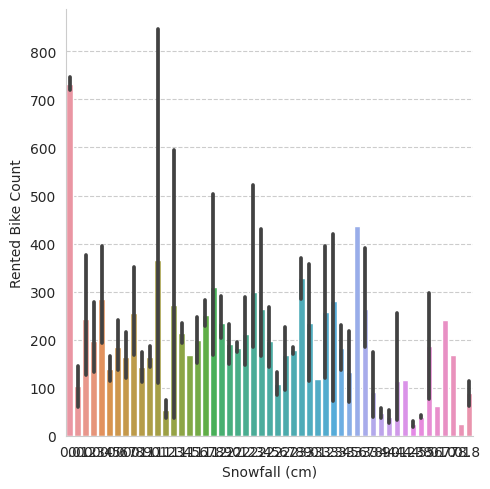

In [241]:
sns.catplot(x='Snowfall (cm)', y='Rented Bike Count', data=df1, kind='bar')


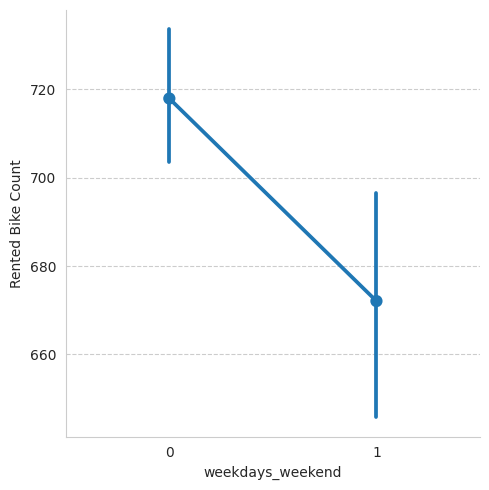

In [242]:
sns.catplot(x='weekdays_weekend', y='Rented Bike Count', data=df1, kind='point')


#**Function** :

In [435]:
from sklearn.model_selection import train_test_split
train_data , test_data=train_test_split(df1,test_size=0.2)


print("Training data:")
print(train_data.head())

# Show the first few rows of the testing data
print("Testing data:")
print(test_data.head())

Training data:
      Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
2273                865    17             10.0           43               1.4   
2354                155     2              2.8           74               1.2   
7554               2378    18             12.1           40               2.4   
2251                289    19             11.2           81               2.3   
1110                140     6              1.2           69               0.6   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
2273              2000                       -2.0                     1.12   
2354               415                       -1.3                     0.00   
7554              1854                       -1.1                     0.18   
2251              1614                        8.0                     0.00   
1110               436                       -3.8                     0.00   

      Rainfall(mm)  Snowfall 

##**Creating Function to train linear models and calculate scores**

In [436]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [437]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)
  
  #finding mean_absolute _error
  MAE = mean_absolute_error(y_test**2, pred**2)
  print("MAE:", MAE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  mean_abs_error.append(MAE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

## **creating function to run diffirent models**

In [438]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    MAE = mean_absolute_error(y_test**2, pred**2)
    print("MAE:", MAE)

    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    mean_abs_error.append(MAE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

##**creating function to get feature importance**

In [439]:
def get_features_importance (optimal_model,X_train):
  
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='grey', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

###**lime tablular** 

In [440]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [441]:
import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  # vaariable to store feature names
  # X=df.drop(dependent_var,axis=1)
  # feature_names =list(X.columns)
  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)


##**Train | Test Split for LR**

In [442]:
# Train - Spliting  data
X=final_df.drop(['Rented Bike Count'],axis=1)

In [443]:
X.shape

(8760, 16)

In [444]:
y=np.sqrt(final_df['Rented Bike Count'])

In [445]:
#splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [446]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

##**Models**:

In [447]:
# importing the libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


##**Linear regression model**

In [448]:
from sklearn.linear_model import LinearRegression

linear_model= LinearRegression()


================Evalution Matrix=========================

MSE : 175590.55287332056
MAE: 278.37245203457013
RMSE : 419.03526447462696
R2 : 0.5729108337712394
Adjusted R2 :  0.5697661367350406

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



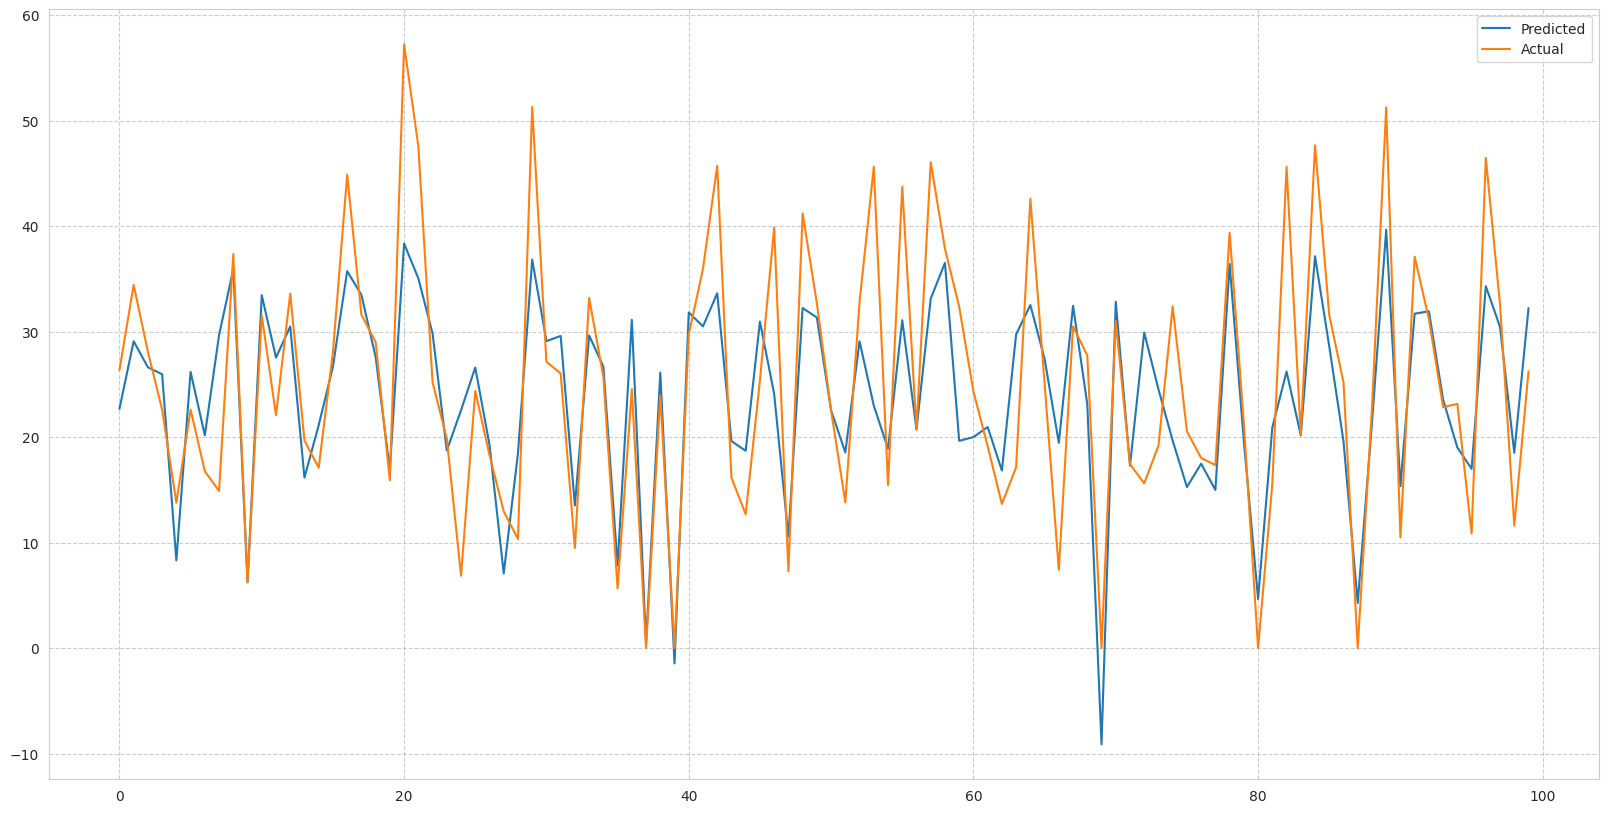

In [449]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

##**Lasso Regression**

In [450]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()

In [451]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evalution Matrix=========================

MSE : 175560.90711843758
MAE: 278.3441015996861
RMSE : 418.9998891627987
R2 : 0.5729829411854939
Adjusted R2 :  0.569838775082856

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



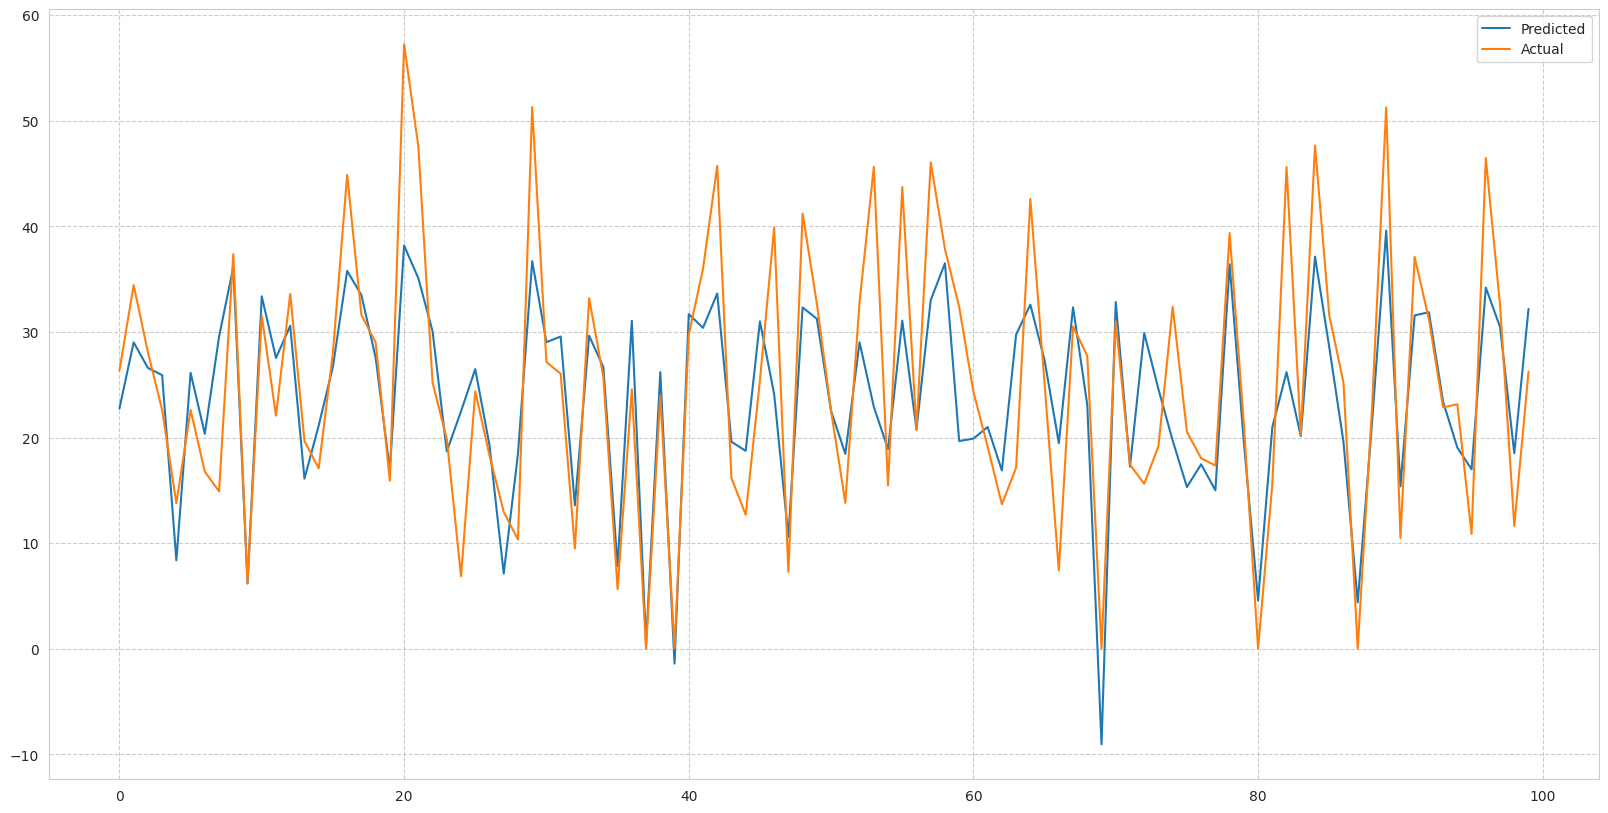

In [452]:
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

##**Ridge Regression**


In [453]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [454]:
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

MSE : 175248.93506569506
MAE: 278.2602853163918
RMSE : 418.6274418450074
R2 : 0.5737417512792726
Adjusted R2 :  0.5706031723655443

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



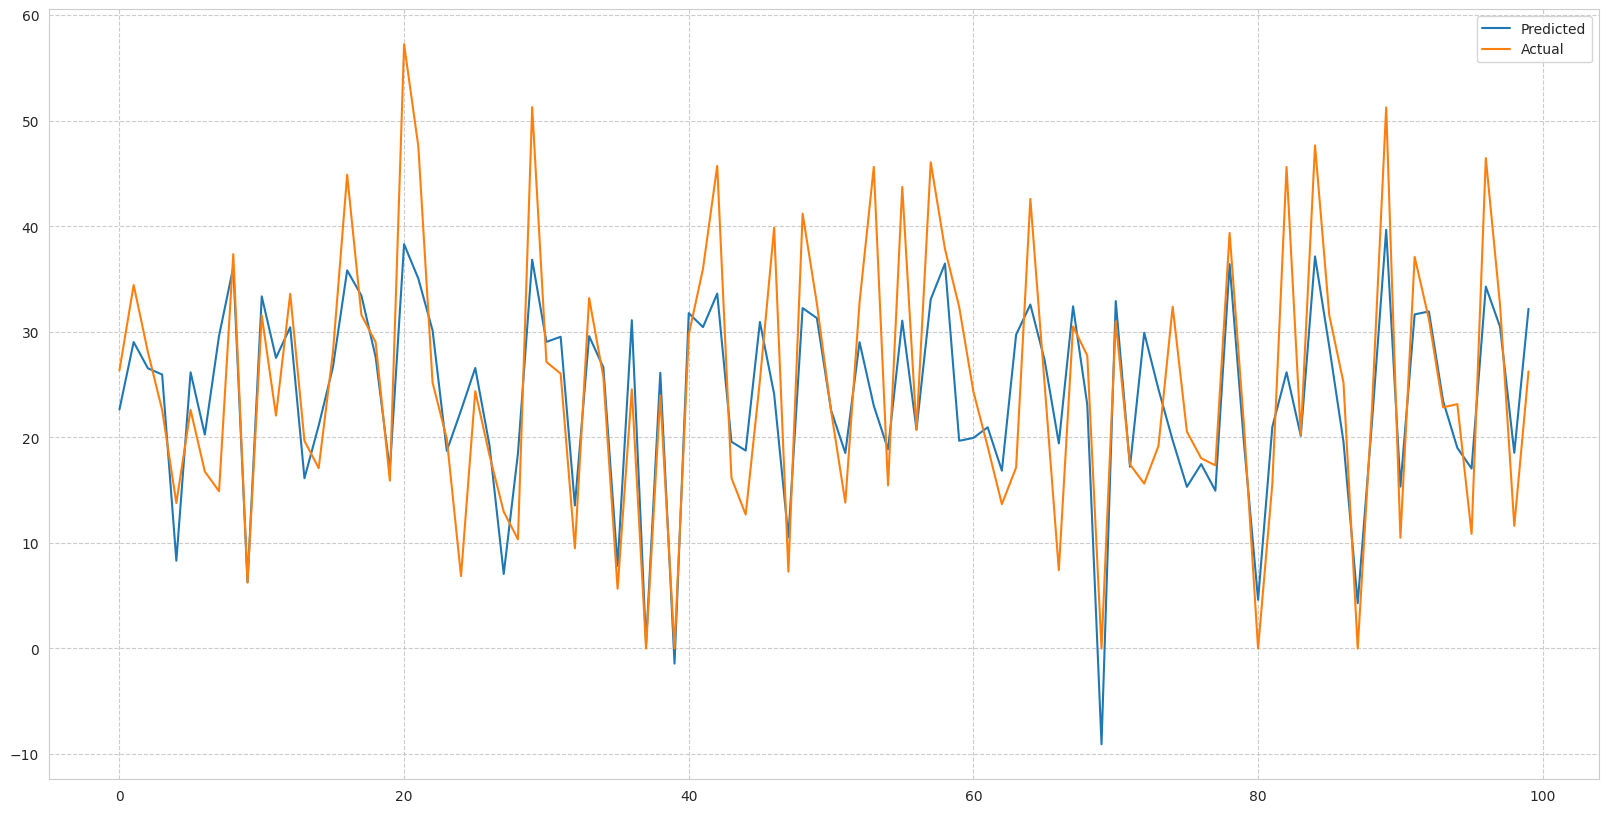

In [455]:
train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

##**ElasticNet Regression**

In [456]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()


In [457]:
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evalution Matrix=========================

MSE : 175346.86749857932
MAE: 278.28342329515846
RMSE : 418.74439399062925
R2 : 0.5735035500752621
Adjusted R2 :  0.5703632172640354

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



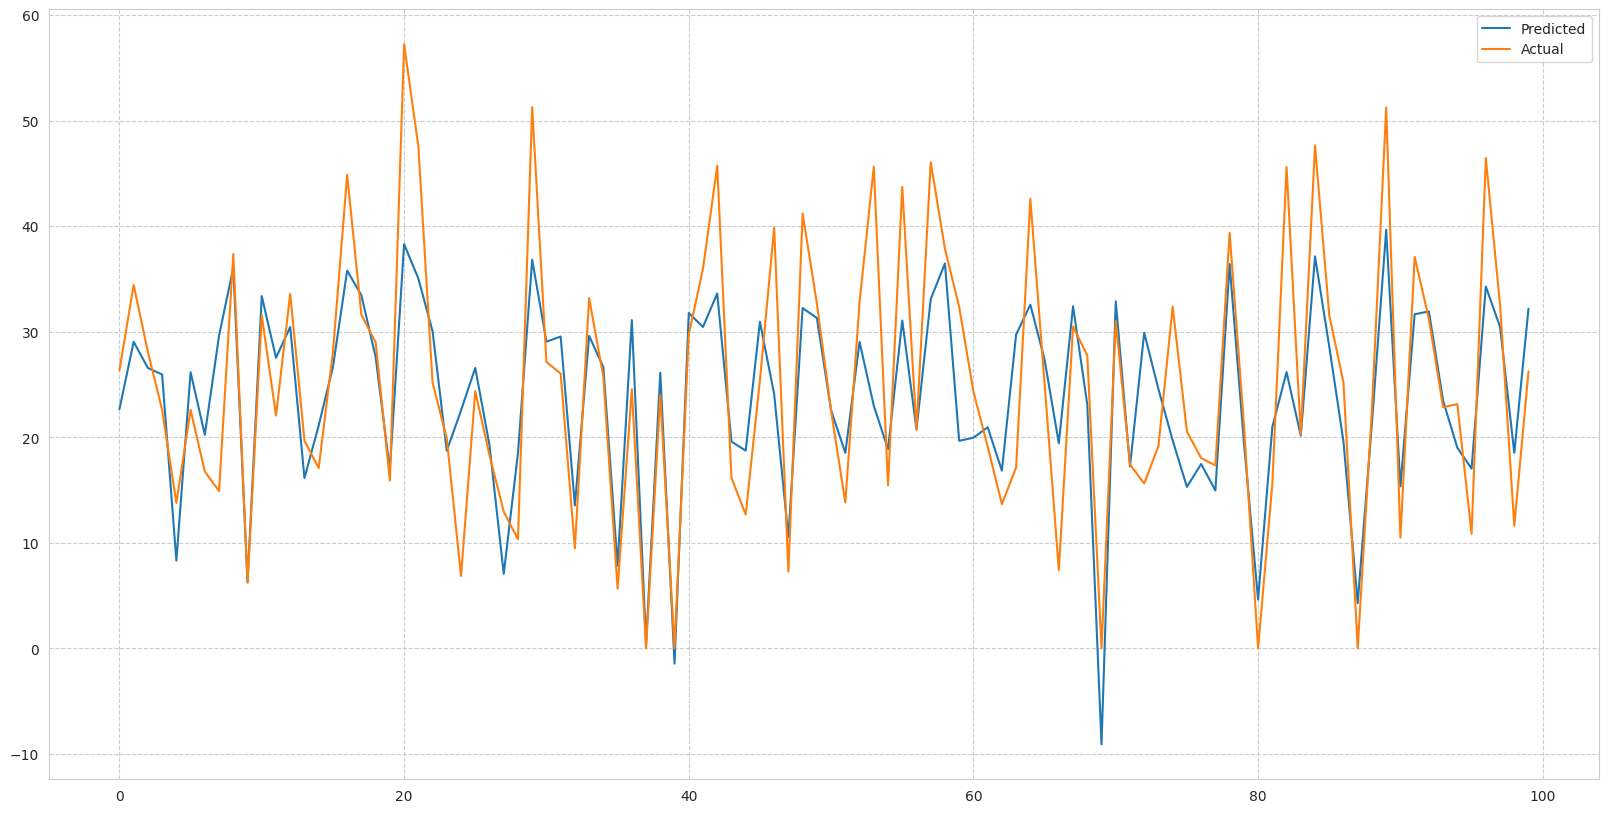

In [458]:
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

##**Polynomial Regression**

In [459]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE : 118205.13966619587
MAE: 225.35729128780974
RMSE : 343.8097434137024
R2 : 0.7124894607489991
Adjusted R2 :  0.7103724940540999

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



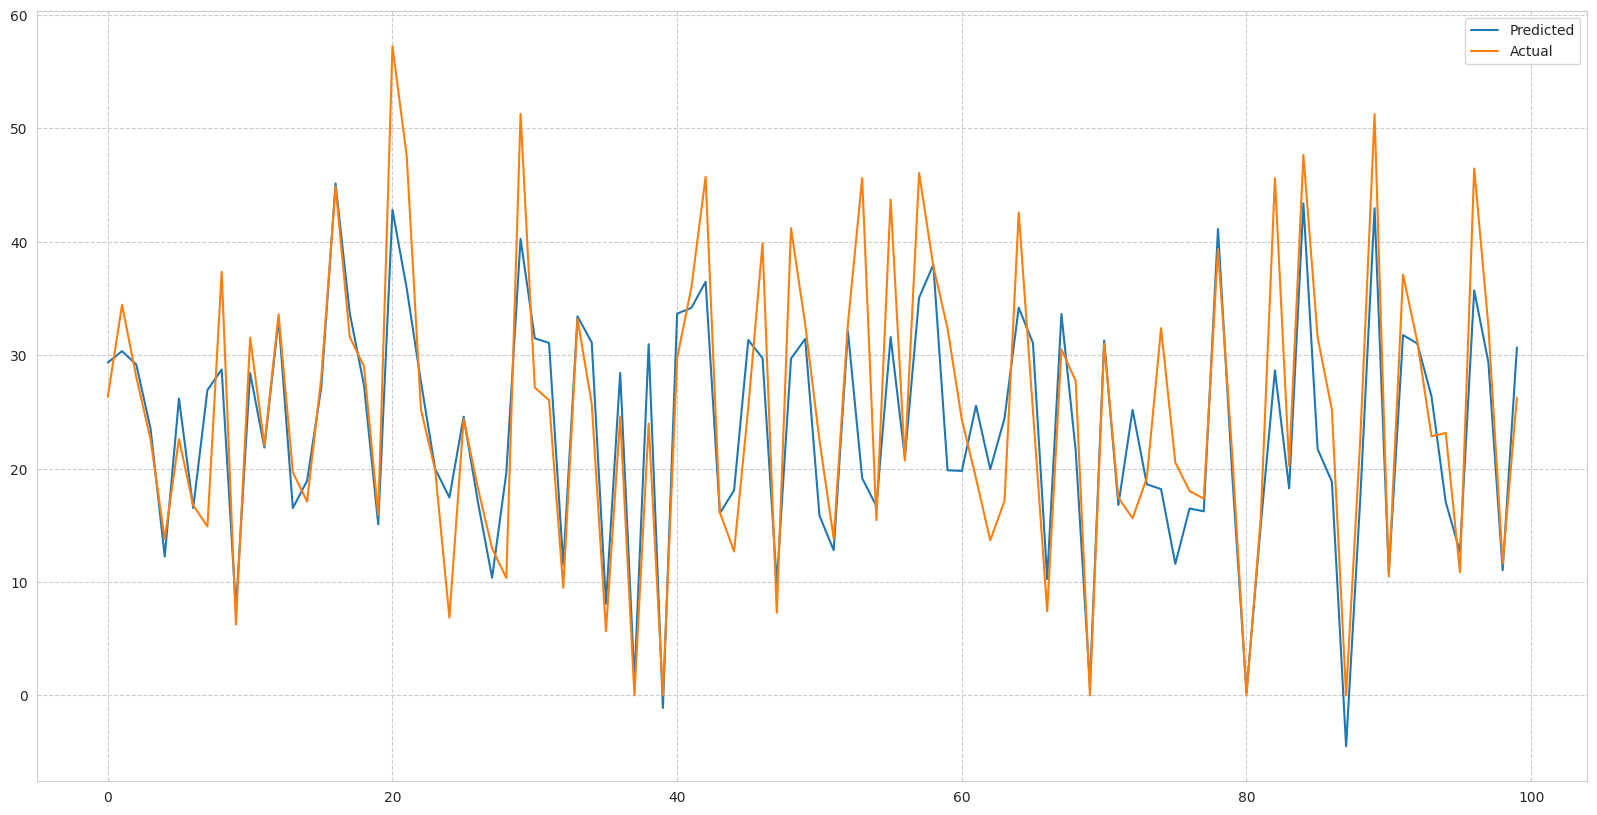

In [460]:
train_linear_model(pipe,X_train,y_train,X_test,y_test)

###**Train | Test split Data For Tree based methods**

In [461]:
#creatin X for independent variable
X=final_df.drop(['Rented Bike Count'],axis=1)

In [462]:
#creating y for dependent variable
y=final_df['Rented Bike Count']

In [463]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

##**KNN Regression model**

In [464]:
#importing Knn 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
knn_model = KNeighborsRegressor(n_jobs=-1)


In [465]:
scaler = MinMaxScaler()

In [466]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


================Evalution Matrix=========================

MSE : 80472.80238457635
MAE: 348669.26357179094
RMSE : 283.67728563382786
R2 : 0.8070143173506771
Adjusted R2 :  0.8055933459183765

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



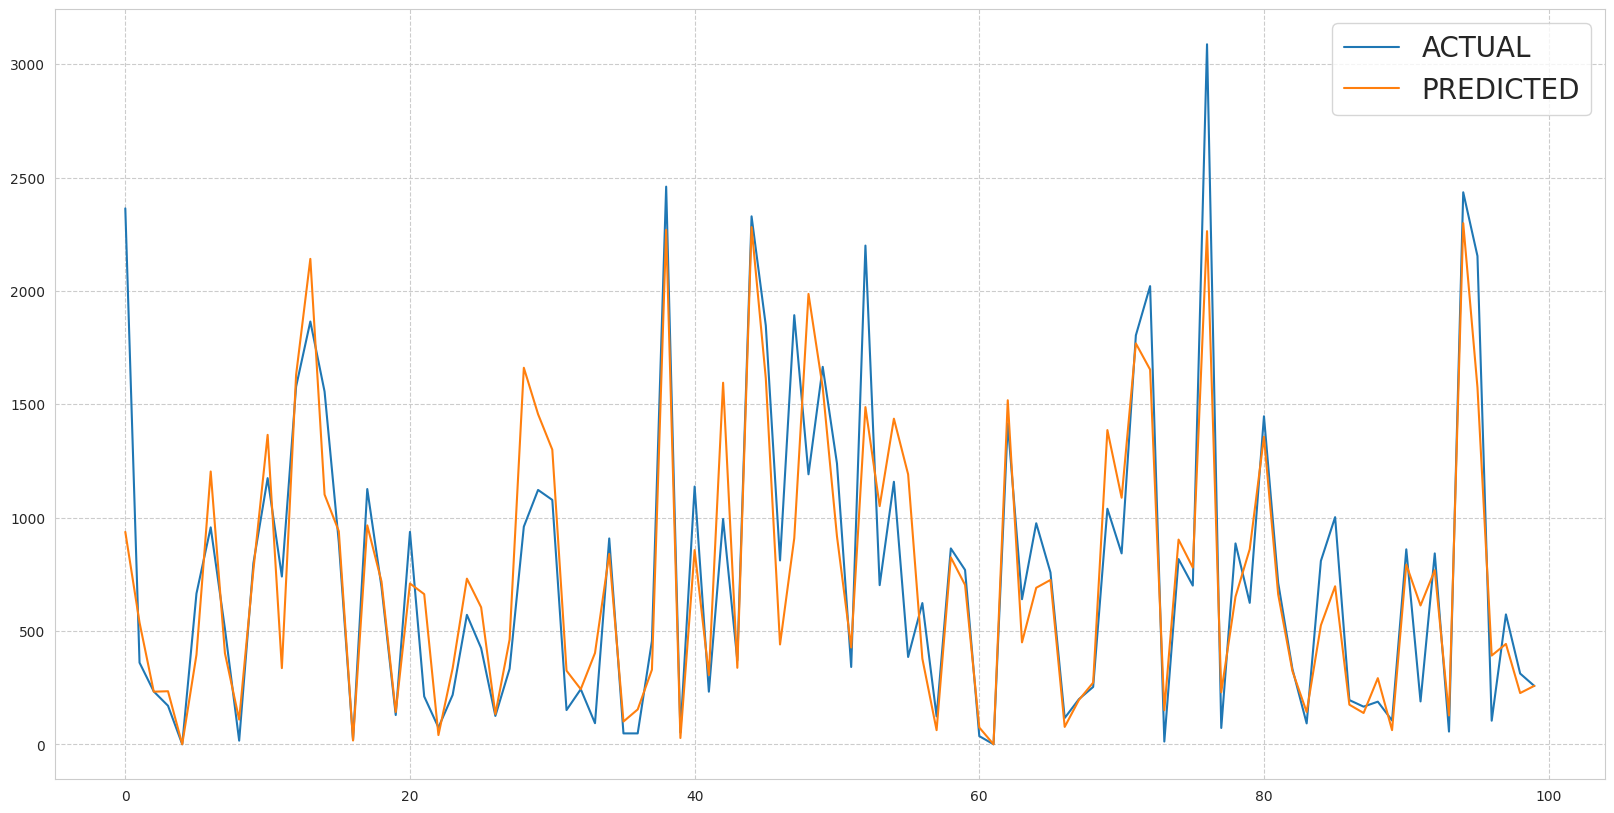

In [467]:
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

##**Decision tree Regression model**

In [468]:
from sklearn.tree import DecisionTreeRegressor


================Evalution Matrix=========================

MSE : 90910.8593607306
MAE: 369111.3616438356
RMSE : 301.514277208776
R2 : 0.7819823128549354
Adjusted R2 :  0.7803770284581011

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



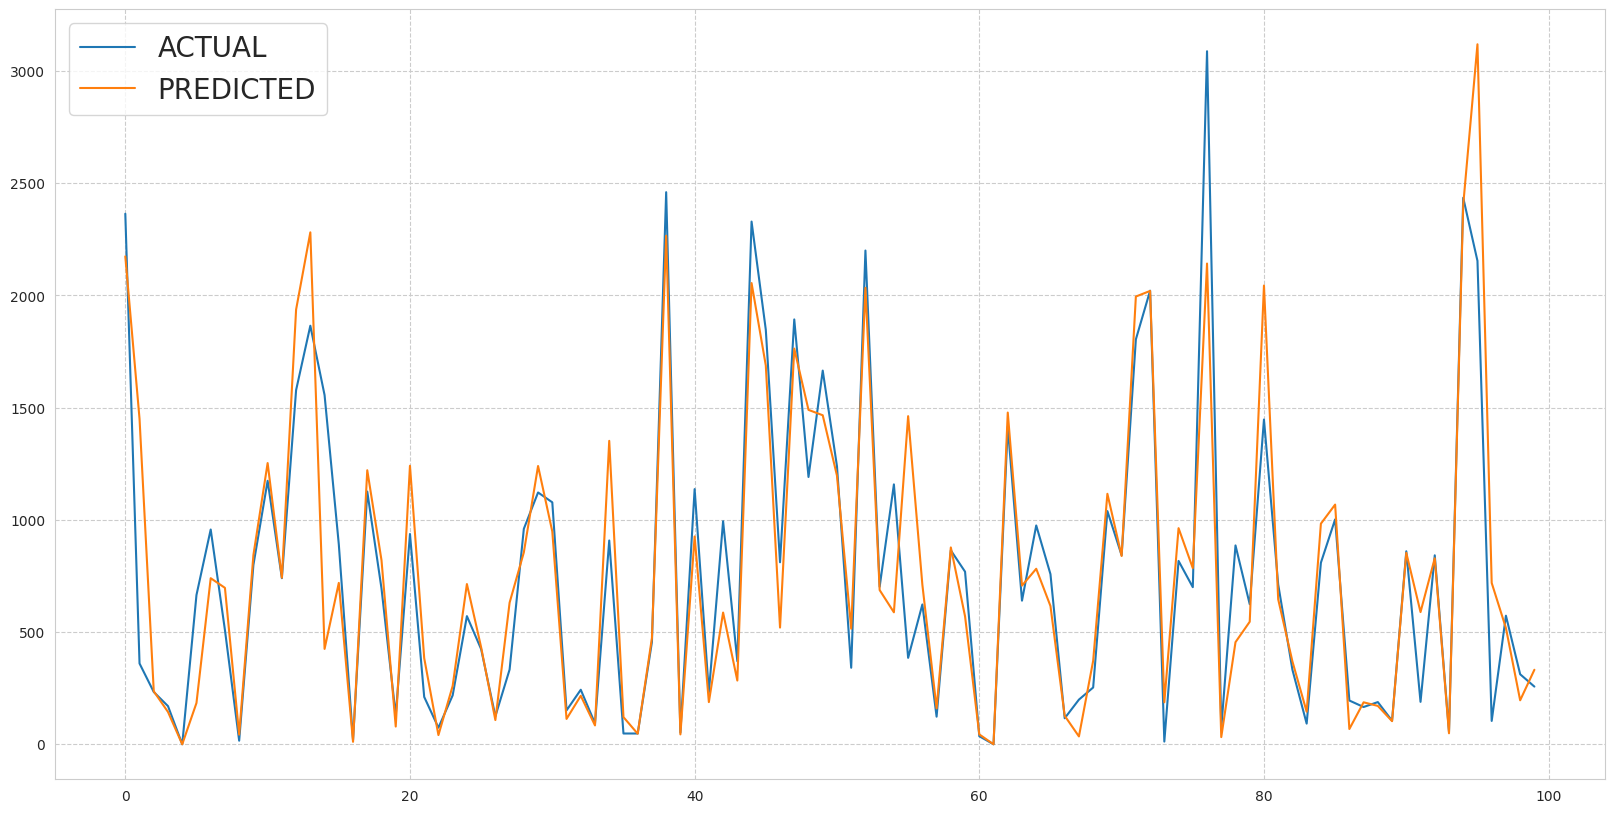

In [469]:
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

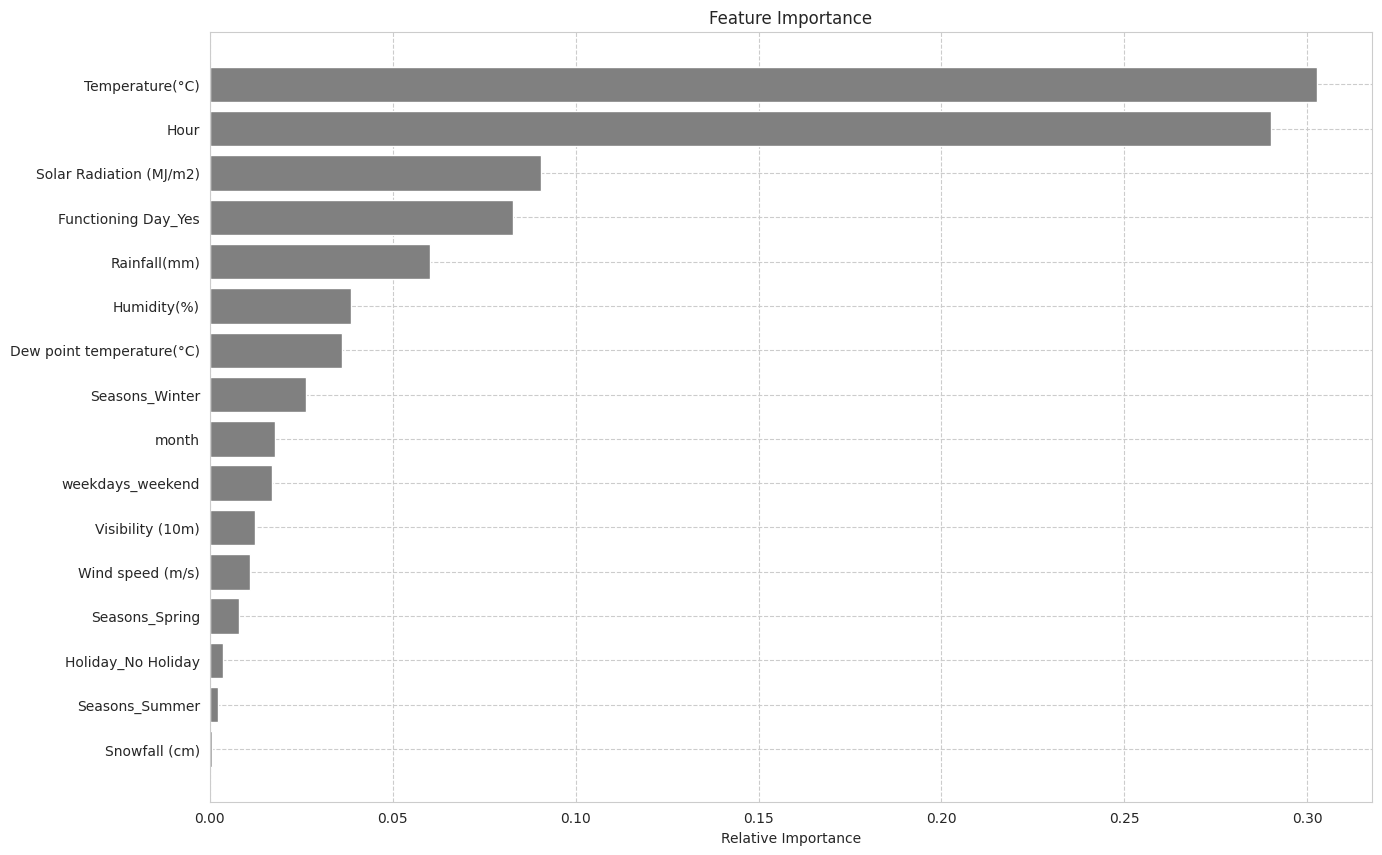

In [470]:
get_features_importance(dt_model,X_train)

##**Random Forest**

In [471]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [472]:
#creating model of random forest
rf_model = RandomForestRegressor()



================Evalution Matrix=========================

MSE : 44571.74185579909
MAE: 261236.051510137
RMSE : 211.12020712333316
R2 : 0.8931103705348353
Adjusted R2 :  0.8923233323059155

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



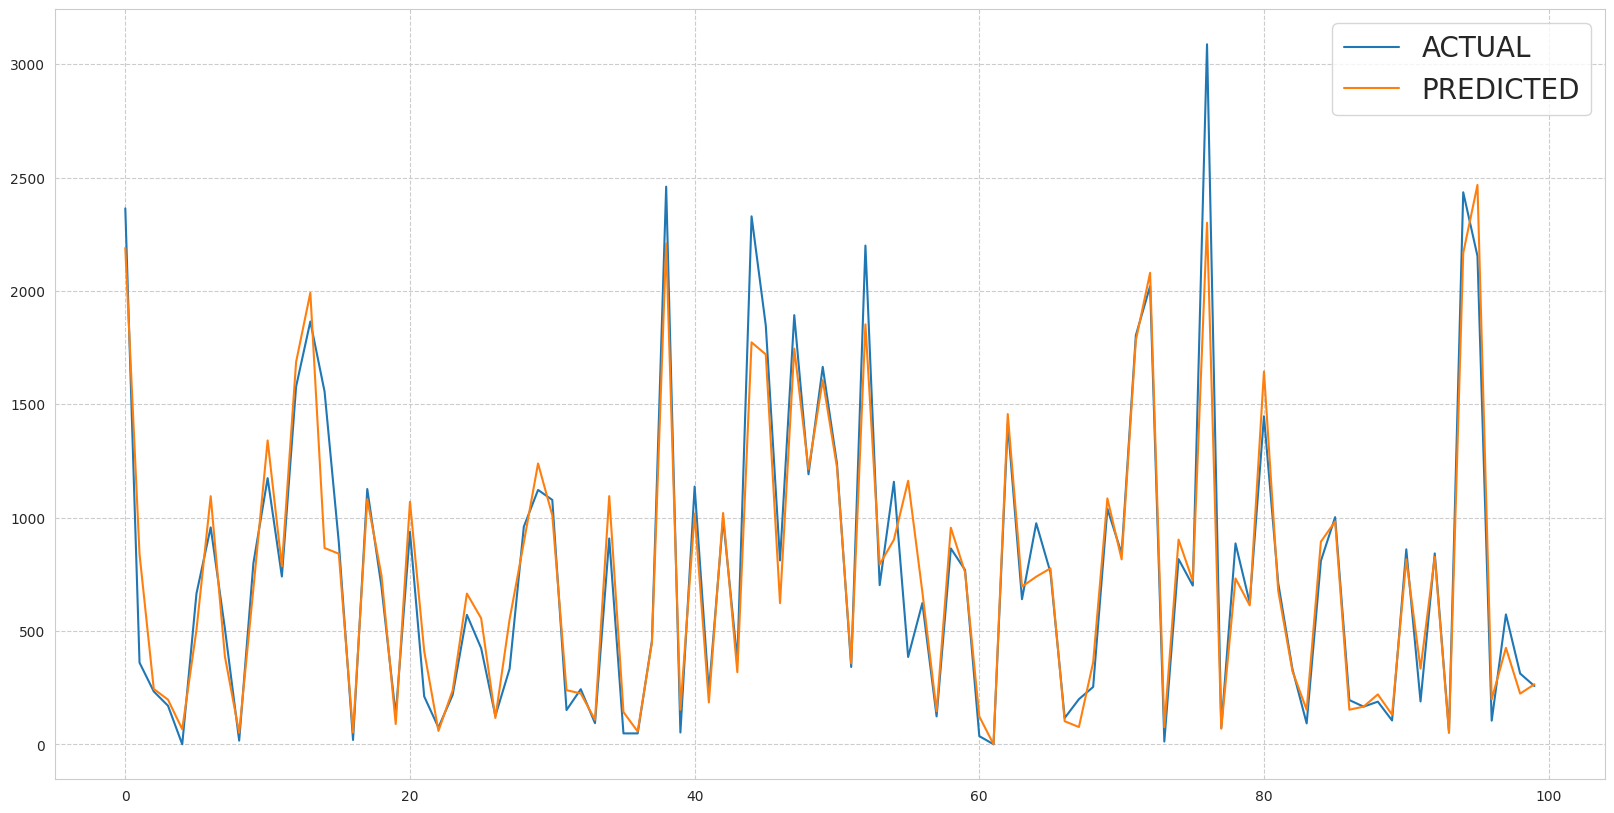

In [473]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_model,X_train,y_train,X_test,y_test)

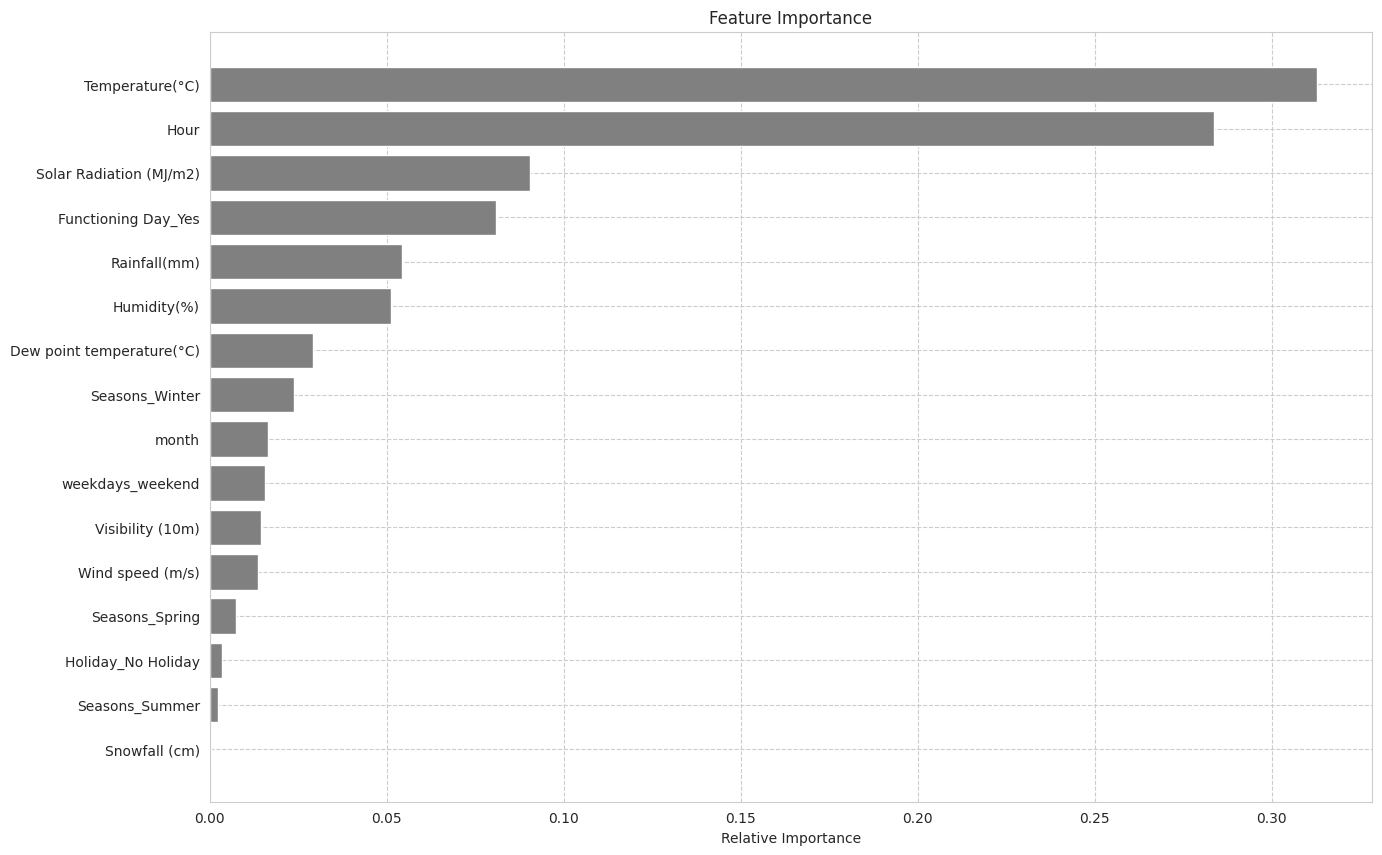

In [474]:
get_features_importance(rf_model,X_train)

##**Gradient Boosting**

In [475]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()


================Evalution Matrix=========================

MSE : 62571.989962568594
MAE: 331011.2200687247
RMSE : 250.14393848856022
R2 : 0.849943113203085
Adjusted R2 :  0.84883823046551

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



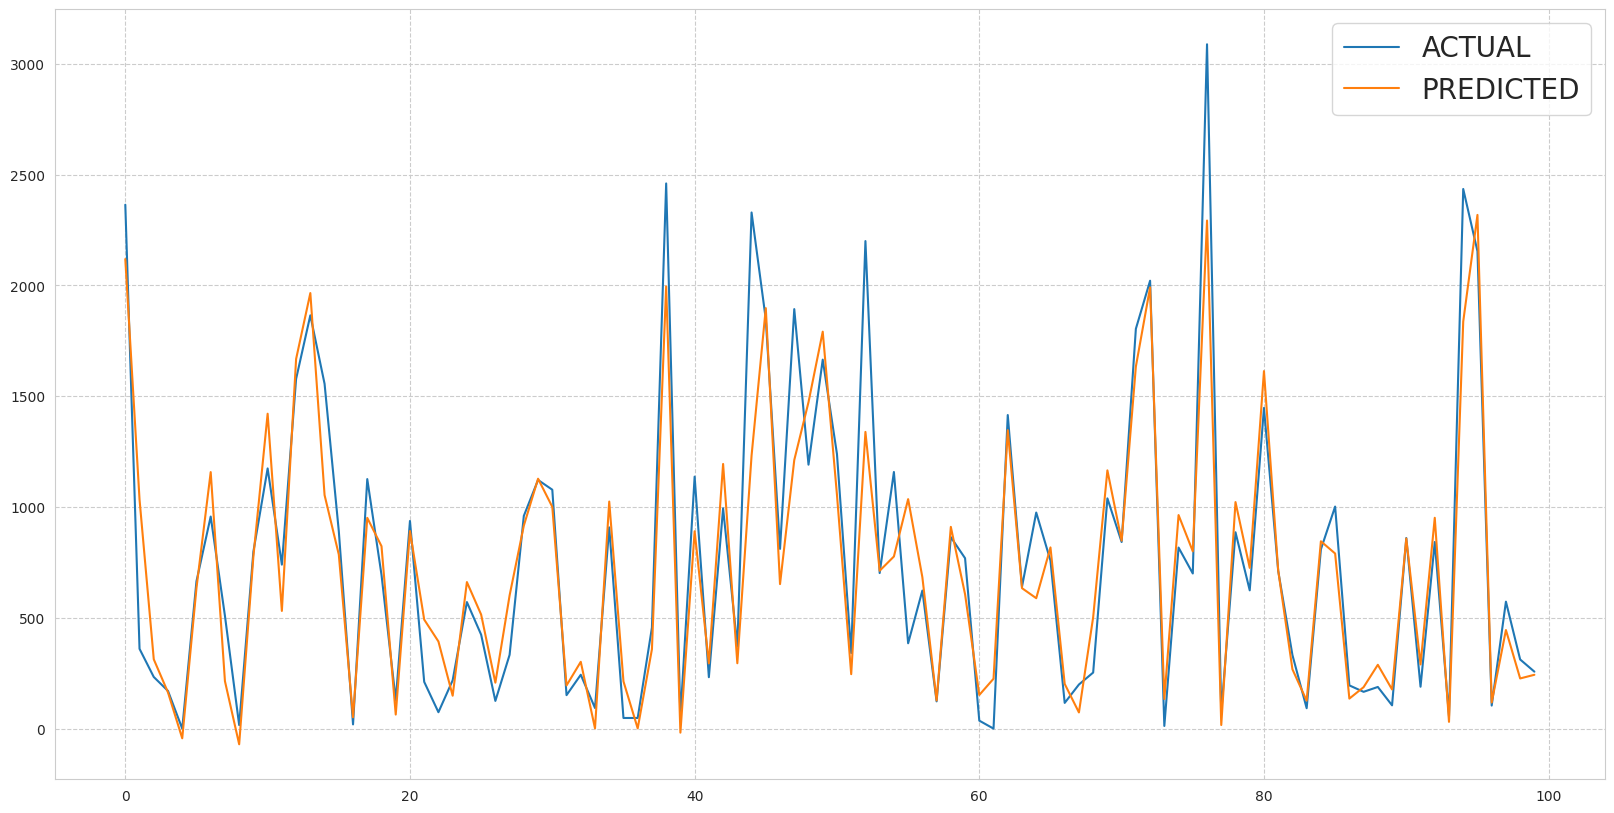

In [476]:
run_model(gb_model,X_train,y_train,X_test,y_test)

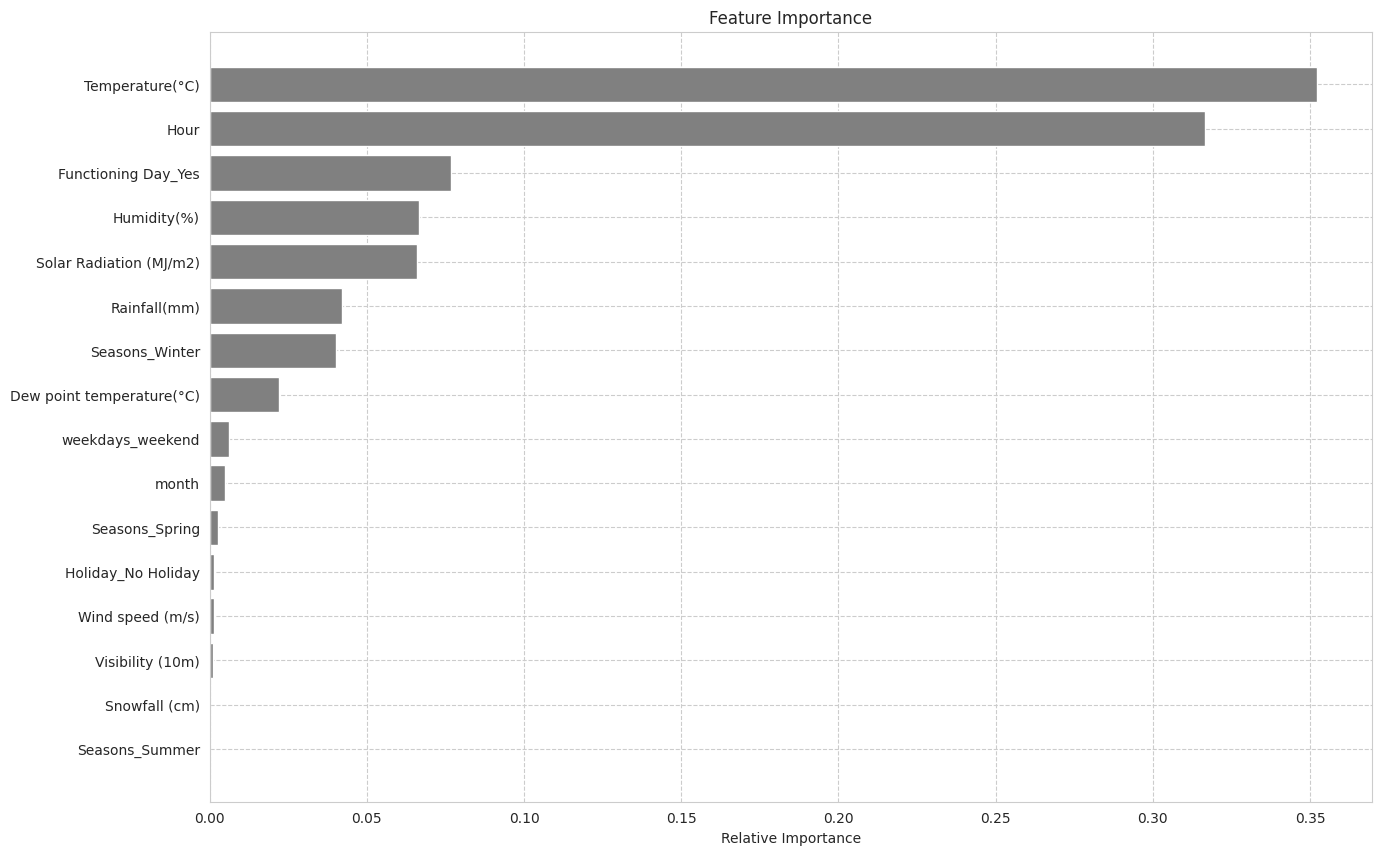

In [477]:
get_features_importance(gb_model,X_train)

##**eXtreme Gradient Boosting Regression**

In [478]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor()


================Evalution Matrix=========================

MSE : 41404.248299034676
MAE: 248799.8217777997
RMSE : 203.48033885128723
R2 : 0.9007064885800132
Adjusted R2 :  0.8999753812708923

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



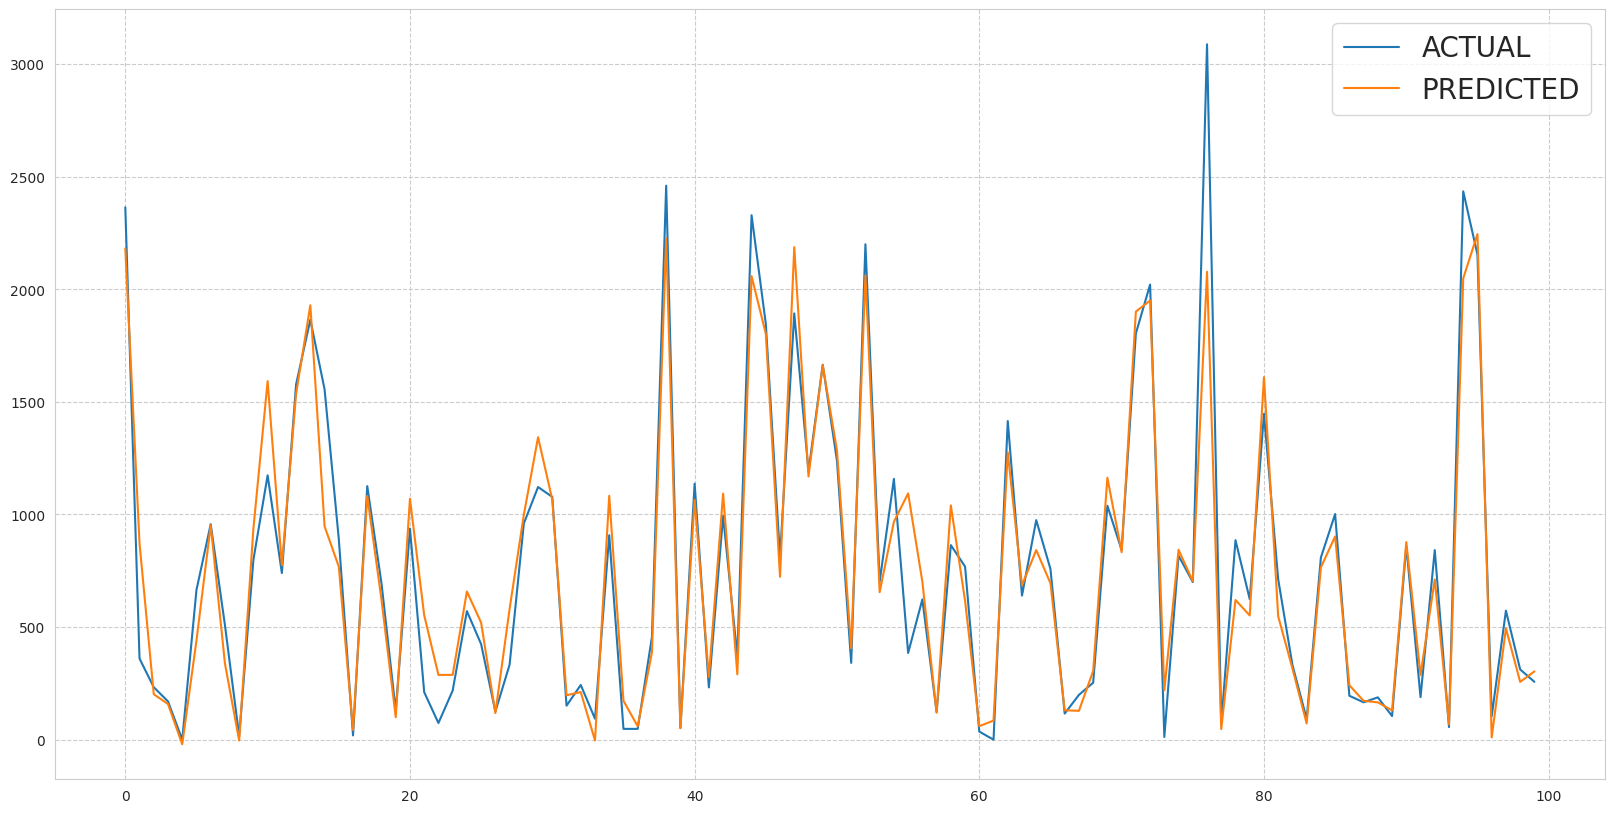

In [479]:
#calling run_model to train,fit and evalution of xgb_model
run_model(xgb_model,X_train,y_train,X_test,y_test)


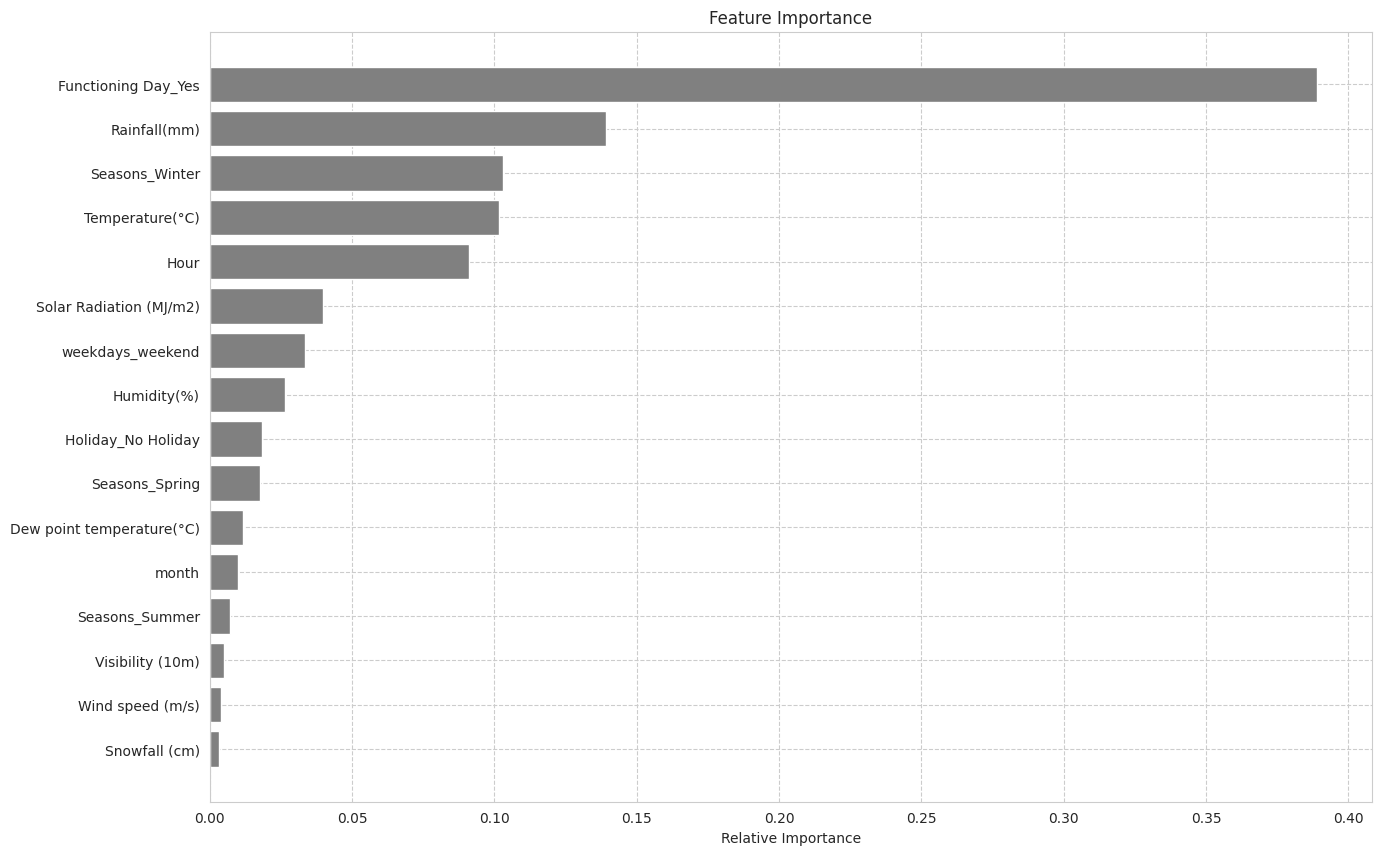

In [480]:
get_features_importance(xgb_model,X_train)

##**LightGBM**

In [481]:
import lightgbm as lgb
lgbr=lgb.LGBMRegressor()

In [482]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

================Evalution Matrix=========================

MSE : 37239.42206498737
MAE: 232368.78921784996
RMSE : 192.97518510157562
R2 : 0.9106943578982996
Adjusted R2 :  0.9100367921948356

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



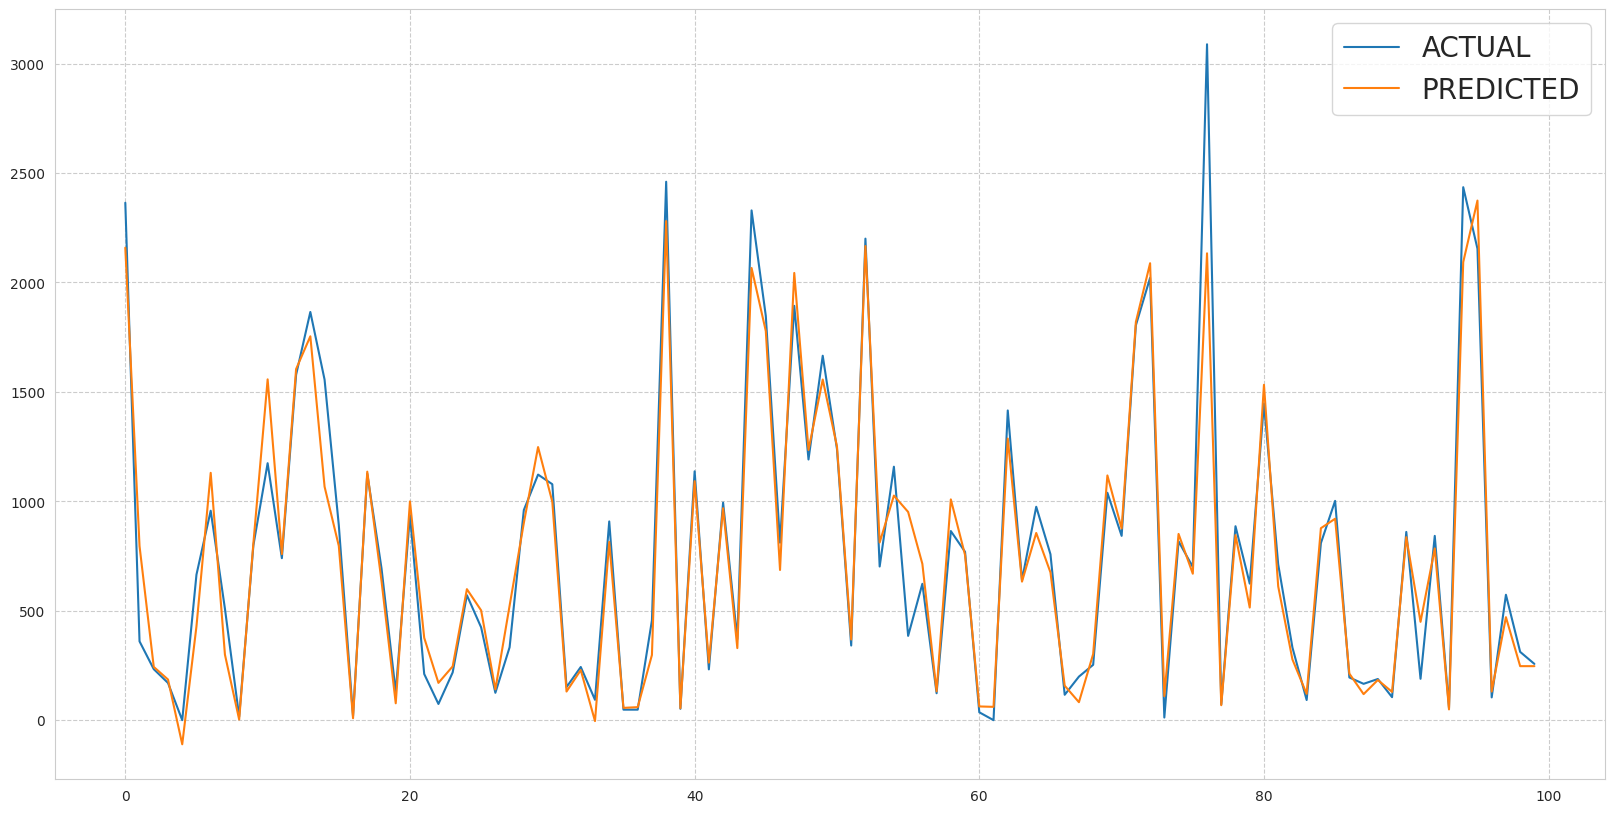

In [483]:
run_model(lgbr_grid,X_train,y_train,X_test,y_test)

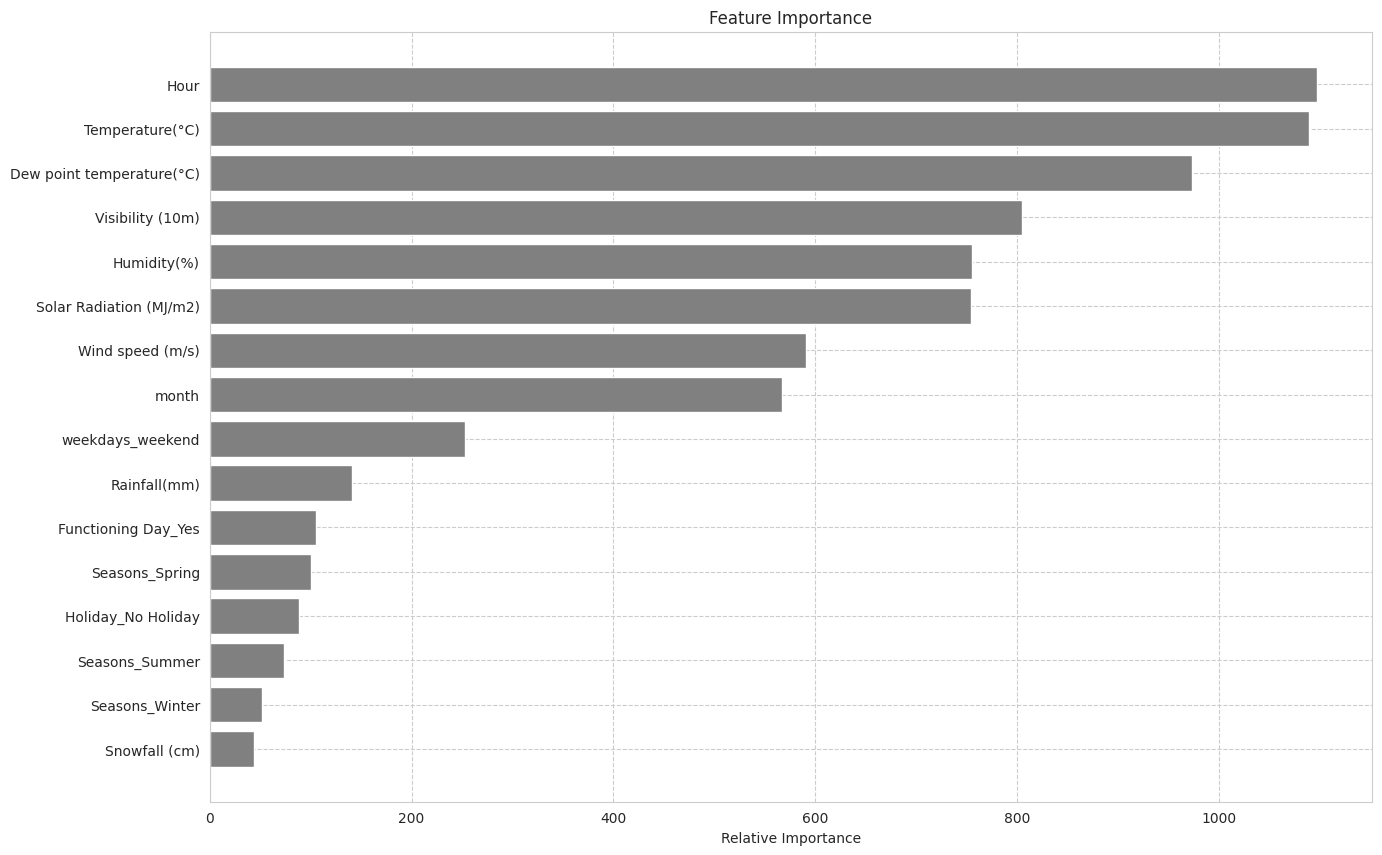

In [484]:
get_features_importance(lgbr_grid.best_estimator_,X_train)


##**Final training result of all models**

In [488]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [486]:
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','K-Nearyest_Neighbor','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','lightGBM']

In [489]:
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index", columns=model_name)

In [490]:
matrices_df

Linear          Lasso          Ridge  \
Mean_square_error       175590.552873  175560.907118  175248.935066   
Root_Mean_square_error     419.035264     418.999889     418.627442   
R2                           0.572911       0.572983       0.573742   
Adjusted_R2                  0.569766       0.569839       0.570603   

                           Elasticnet     Polynomial  K-Nearyest_Neighbor  \
Mean_square_error       175346.867499  118205.139666         80472.802385   
Root_Mean_square_error     418.744394     343.809743           283.677286   
R2                           0.573504       0.712489             0.807014   
Adjusted_R2                  0.570363       0.710372             0.805593   

                        Decision_Tree  Random_Forest  Gradient_Boosting  \
Mean_square_error        90910.859361   44571.741856       62571.989963   
Root_Mean_square_error     301.514277     211.120207         250.143938   
R2                           0.781982       0.893110           0.849943   
Adjusted_R2                  0.780377       0.892323           0.848838   

                           Xtreme_GB      lightGBM  
Mean_square_error       41404.248299  37239.422065  
Root_Mean_square_error    203.480339    192.975185  
R2                          0.900706      0.910694  
Adjusted_R2                 0.899975      0.910037

In [496]:
result=matrices_df.T.reset_index().rename(columns={'index':'Models'})
result

Models  Mean_square_error  Root_Mean_square_error        R2  \
0                Linear      175590.552873              419.035264  0.572911   
1                 Lasso      175560.907118              418.999889  0.572983   
2                 Ridge      175248.935066              418.627442  0.573742   
3            Elasticnet      175346.867499              418.744394  0.573504   
4            Polynomial      118205.139666              343.809743  0.712489   
5   K-Nearyest_Neighbor       80472.802385              283.677286  0.807014   
6         Decision_Tree       90910.859361              301.514277  0.781982   
7         Random_Forest       44571.741856              211.120207  0.893110   
8     Gradient_Boosting       62571.989963              250.143938  0.849943   
9             Xtreme_GB       41404.248299              203.480339  0.900706   
10             lightGBM       37239.422065              192.975185  0.910694   

    Adjusted_R2  
0      0.569766  
1      0.569839  
2      0.570603  
3      0.570363  
4      0.710372  
5      0.805593  
6      0.780377  
7      0.892323  
8      0.848838  
9      0.899975  
10     0.910037

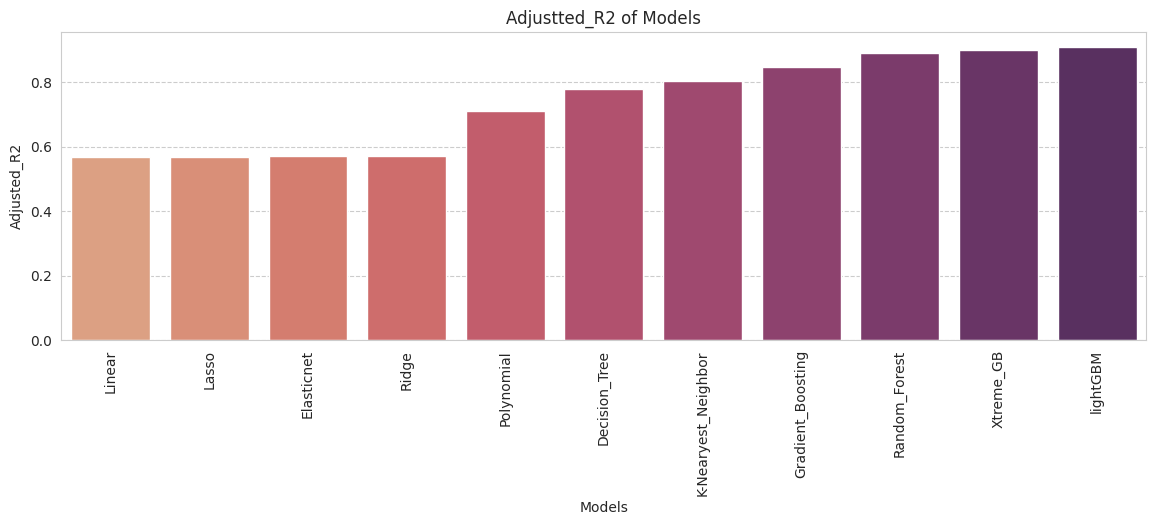

In [497]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=result.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

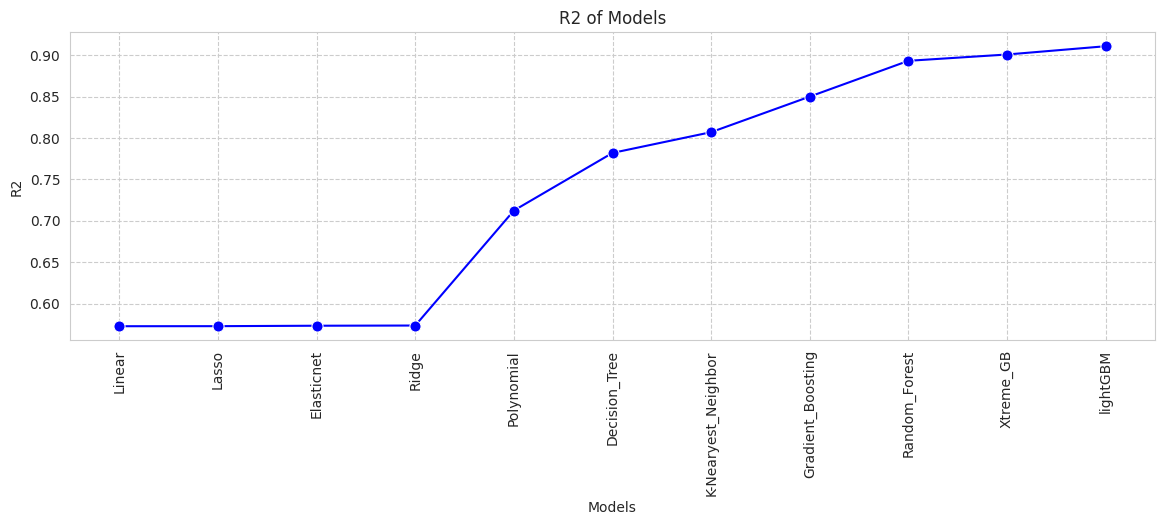

In [499]:
# Create a line plot of R2 scores
plt.figure(figsize=(14,4),dpi=100)
sns.lineplot(x='Models', y='R2', data=result.sort_values('R2'), marker='o', markersize=8, color='blue')
plt.title('R2 of Models')
plt.xlabel('Models')
plt.ylabel('R2')
plt.xticks(rotation=90)
plt.show()

#**Conclusion**

**1.Preprocessing the data was one of the difficult challenges i faced.**

**2.There is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.**

**3.People prefered more rented bikes in the morning than the evening.**

**4.When the rainfall was less, people have booked more bikes except some few cases.**

**7.The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.**

**8.After performing the various models the lightGBM and Catboost found to be the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) shows a higher value for the lightGBM.**

**9.We can use either lightGBM or catboost model for the bike rental stations.**

**10.holiday or non-working days there is demands in rented bikes.**

**11.Using different plots made the EDA easy**

**12.I have calculated MAE,MSE,RMSE,adjusted r2 and R2 score for each model. Based on r2 score will decide our model performance.**

**13.